# <font color='red'> 0 - ENTENDIMENTO DO NEGÓCIO

### <font color='blue'> DESCRIÇÃO DO NEGÓCIO

- Base de dados: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis

<font color='green'> **Objetivo:**
- Análisar a personalidade dos usuários da plataforma para entender como seus clientes podem ser agrupados, para resumir os segmentos de clientes.

<font color='green'> **O contexto:**
    
- A empresa tem um novo produto para comercializar para cada cliente do seu banco de dados, mas precisa analisar qual segmento de cliente tem maior probabilidade de comprar o produto e então comercializar o produto apenas naquele segmento específico.

<font color='green'> **Stakeholder:**
- Gerente de estratégia de marketing.

<font color='green'> **O formato da solução:**
- Granularidade
    -   A análise será realizada a nível de indivíduos, ou seja, cada usuário da plataforma será analisado individualmente.    
    
    
- Tipo do problema
    -  O problema é de segmentação de clientes com base em suas personalidades para direcionar melhor os esforços de marketing e aumentar a probabilidade de sucesso na comercialização de um novo produto.
    
    
- Potenciais métodos
    - Podemos utilizar métodos de análise de clusters, como o k-means, para agrupar os clientes com base em suas personalidades. Além disso, técnicas de análise de dados como regressão logística e árvores de decisão podem ser usadas para identificar os fatores que mais influenciam a decisão de compra dos clientes.
    
    
- Formato da entrega
    - A entrega será um relatório que apresentará a segmentação dos clientes com base em suas personalidades, os fatores que mais influenciam a decisão de compra dos clientes e as recomendações para a empresa direcionar seus esforços de marketing para cada segmento identificado.

    
**Resumo:** Através da análise de clusters e técnicas de análise de dados, iremos segmentar os clientes com base em suas personalidades e identificar os fatores que mais influenciam a decisão de compra dos clientes. A entrega será um relatório que apresentará as recomendações para a empresa direcionar seus esforços de marketing para cada segmento identificado, aumentando assim a probabilidade de sucesso na comercialização de um novo produto.

### <font color='blue'> PLANEJAMENTO DA SOLUÇÃO

**O pipeline ideal para ciência de dados depende do contexto específico de cada projeto e da organização em que o trabalho está sendo realizado.**

<font color='red'> **O planejamento da solução para este projeto se baseia nas seguintes etapas:**

0. **ENTENDIMENTO DO NEGÓCIO**
<p>Definição do problema: É importante definir claramente qual é o problema a ser resolvido ou a pergunta a ser respondida. É preciso entender o objetivo do projeto e a relevância do problema.</p>

    - Descrição do negócio
    - Planejamento da solução


1. **IMPORTANDO AS BIBLIOTECAS**
<p>Importação de bibliotecas: Nesta etapa, as bibliotecas necessárias para o desenvolvimento do modelo de machine learning são importadas. Isso inclui bibliotecas para manipulação de dados, visualização, modelagem e avaliação.</p>


2. **COLETA DOS DADOS**
<p>Coleta de dados: Nesta etapa, os dados são coletados a partir de diversas fontes, como bases de dados, APIs, arquivos de texto, imagens, etc.</p>


3. **FUNÇÕES AUXILIARES**
<p>Funções auxiliares: Nesta etapa, são criadas funções que irão auxiliar na manipulação e no processamento dos dados, na modelagem e na avaliação do modelo de machine learning. Essas funções são utilizadas em etapas posteriores do projeto.</p>


4. **ANÁLISE EXPLORATÓRIA DOS DADOS**
<p>Análise exploratória de dados: Nesta etapa, os dados são analisados para identificar possíveis padrões, tendências, correlações e informações relevantes que possam auxiliar na construção do modelo de machine learning. É importante entender os dados coletados, avaliar a qualidade dos dados e identificar quaisquer problemas ou limitações.</p>

    - **Passo 1:** Análise Descritiva dos Dados
        - Esta etapa consiste na descrição estatística dos dados coletados, como média, mediana, desvio padrão, entre outros.
    - **Passo 2:** Exploração de Dados
        - Nesta etapa, os dados são visualizados e analisados graficamente para identificar padrões e relações entre as variáveis. 
    
    
5. **PRÉ-PROCESSAMENTO**
<p>Preparação de dados ou Pré-processamento de dados: Nesta etapa, os dados são limpos, transformados e preparados para serem utilizados no modelo de machine learning. Isto inclui tarefas como normalização, codificação, preenchimento de valores ausentes, remoção de outliers, etc.</p>


6. **TREINAMENTO ALGORITMOS DE MACHINE LEARNING**
<p>Modelagem ou Seleção do modelo: Nesta etapa, um modelo de machine learning é escolhido com base na tarefa a ser realizada e nos dados disponíveis.</p>


7. **AVALIAÇÃO DO ALGORITMO**
<p>Avaliação do modelo: Nesta etapa, o desempenho do modelo é avaliado utilizando métricas adequadas para o tipo de problema e modelo utilizado.</p>


8. **INSIGHTS**
<p>Nesta etapa, são identificadas as principais descobertas e conclusões do projeto.</p>

# <font color='red'> 1 - IMPORTANDO AS BIBLIOTECAS

In [1]:
import pickle

import pandas             as pd
import numpy              as np
import seaborn            as sns
import matplotlib.pyplot  as plt

from datetime                import datetime
from sklearn.preprocessing   import MinMaxScaler
from sklearn.cluster         import KMeans
from IPython.display         import Image
from matplotlib.gridspec     import GridSpec
from functools               import reduce

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [3]:
pd.set_option('display.max_columns',None)

# <font color='red'> 2 - COLETA DOS DADOS

In [4]:
df = pd.read_csv('Dataset/marketing_campaign.csv', delimiter='\t')

# <font color='red'> 3 - FUNÇÕES AUXILIARES

**Criar funções auxiliares para dataframe**

In [5]:
# Verificar valores nulos e o tipo dos dados
def show_null(df):
    null_columns = (df.isnull().sum(axis=0)/len(df)).sort_values(ascending=False).index
    
    null_data = pd.concat([df.isnull().sum(axis=0), 
                           (df.isnull().sum(axis=0)/len(df)).sort_values(ascending=False), 
                           df.loc[:, df.columns.isin(list(null_columns))].dtypes], 
                          axis=1)
    
    null_data = null_data.rename(columns={0: 'QTD', 
                                          1: '% null', 
                                          2: 'Type'}).sort_values(ascending=False, by='% null')
    
    return null_data

In [6]:
# Gráfico boxplot
def plot_num(df, feature, titulo):
    fig = plt.figure(figsize=(8,5))    
    # Para que o título não fique cortado na figura.
    plt.subplots_adjust(top=0.9)
    # Título
    plt.suptitle(titulo,fontsize=20,y=1.00, x=0, horizontalalignment='left')
    
    gs = GridSpec(1,2)
    sns.boxplot(y=feature, data=df, palette="RdYlGn",ax=fig.add_subplot(gs[0,0]))
    plt.ylabel(feature, fontsize=15)
    
    sns.stripplot(y=df[feature], color='darkcyan', ax=fig.add_subplot(gs[0,1]))
    plt.ylabel(None)
    plt.gca().set_yticklabels([]) # Remove os valores do eixo y do boxplot
    
    plt.savefig(f'Imagens/{titulo}.png', bbox_inches='tight')
    plt.show()

In [7]:
# Gráfico barras - podemos usar para variáveis categóricas
def plot_cat(df, feature, titulo):
    fig = plt.figure(figsize=(10,5))
    # Para que o título não fique cortado na figura.
    plt.subplots_adjust(top=0.9)
    # Título
    plt.suptitle(titulo,fontsize=20,y=1.00, x=0, horizontalalignment='left')
    
    ax = sns.countplot(data=df, x=feature, palette = "Set2")
    for p in ax.patches:
        
        ax.annotate(f'\n{p.get_height()}', 
                    (p.get_x()+0.4, p.get_height()+10), 
                    ha='center', 
                    fontsize=10, 
                    color='black')
        
    plt.xlabel('\n' + feature, fontsize=12)
    plt.ylabel('Quantidade de Clientes', fontsize=12)
    plt.yticks([])
    plt.xticks(fontsize = 10)

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    
    plt.savefig(f'Imagens/{titulo}.png', bbox_inches='tight')
    plt.show()

In [8]:
def scaler(df):
    df2 = df.copy()
    for column in df2:
        minimo = df2[column].min()
        maximo = df2[column].max()
        df2[column] = (df[column] - minimo)/(maximo - minimo)
    return df2

In [9]:
# Gráfico boxplot
def plot_final(df, x_feature, y_feature, titulo):
    fig = plt.figure(figsize=(20,8))
    
    # Para que o título não fique cortado na figura.
    plt.subplots_adjust(top=0.9)
    # Título
    plt.suptitle(titulo,fontsize=20,y=1.00, x=0.09, horizontalalignment='left')
    
    gs = GridSpec(1,2)
    
    sns.boxplot(x=x_feature, y=y_feature, data=df, ax=fig.add_subplot(gs[0,0]))
    plt.ylabel(y_feature)
    plt.xlabel(x_feature)
    
    sns.stripplot(x=x_feature, y=y_feature, data=df, ax=fig.add_subplot(gs[0,1]))    
    plt.ylabel(None)
    plt.xlabel(x_feature)
    #plt.gca().set_yticklabels([]) # Remove os valores do eixo y do boxplot
    
    plt.savefig(f'Imagens/{titulo}.png', bbox_inches='tight')
    
    plt.show()

In [10]:
def plot_data(df, feature, titulo, subtitulo, cor, plot_type):
    if plot_type == 'histogram2':

        sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})
        # Variables
        colors = cor
        title = titulo
        subtitle = subtitulo

        # Create subplots
        fig, ax = plt.subplots(nrows=1, 
                               ncols=2, 
                               figsize=(16, 5), 
                               gridspec_kw={'width_ratios': [1, 2]})

        # Bar plot
        sns.countplot(data=df, 
                      x='group_age', 
                      ax=ax[FIRST_FIG], 
                      palette=colors)
        ax[FIRST_FIG].bar_label(ax[FIRST_FIG].containers[0])
        ax[FIRST_FIG].set_title(label='Age by range', 
                                fontsize=11)
        ax[FIRST_FIG].set(xlabel='Age range',
                          ylabel='Count')

        # Histogram
        sns.histplot(data=df, 
                     x='Age', 
                     ax=ax[SECOND_FIG], 
                     color='#4BBFCC')

        mean_age = df[feature].mean() # calc mean age
        median_age = df[feature].median() # calc median age

        ax[SECOND_FIG].set(xlabel='Age',
                           ylabel='Count')
        ax[SECOND_FIG].set_title(label='Distribution',
                                 fontsize=11)
        ax[SECOND_FIG].axvline(mean_age, 
                               color='#4250BC', 
                               ls="--", 
                               label="Mean age") #line mean age
        ax[SECOND_FIG].axvline(median_age, 
                               color="#232B64", 
                               ls="-", 
                               label="Median age") # line median age
        # ax[SECOND_FIG].xlabel('hi')
        ax[SECOND_FIG].legend()

        sns.despine(left=True)

        # title
        fig.suptitle(title,
                     x=0.1, 
                     y=1.1, 
                     horizontalalignment='left', 
                     verticalalignment='top', 
                     fontsize=14)

        fig.text(0.12, 
                 1.03, 
                 subtitle, 
                 horizontalalignment='left', 
                 verticalalignment='top', 
                 color=SUBTITLE_COLOR,
                 fontstyle="italic", 
                 fontsize = 11)
        print()

        plt.savefig(f'Imagens/{title}.png', bbox_inches='tight') # linha adicionada para salvar a imagem    
#------------------------------------------------------------------------------------------------------------------------
        
    elif plot_type == 'histogram1':
        # Set figure size
        plt.figure(figsize=(12, 5))

        # variabels
        colors = cor
        title = titulo
        subtitle = subtitulo
        label_order = ['Graduation',
                       'PhD',
                       'Master',
                       '2n Cycle',
                        'Basic']

        # plot figure
        fig = sns.countplot(data=df, 
                            x=feature, 
                            palette=colors,
                            order=label_order)

        # Setting up layout
        fig.set(ylabel='Count')
        fig.bar_label(fig.containers[0])

        plt.title(title, 
                  x=0.20,
                  y=1.1,
                  fontsize=14)
        plt.suptitle(subtitle,  
                 color=SUBTITLE_COLOR,
                 x=0.5,
                 y=0.94,
                 fontstyle="italic",
                 fontsize = 11)

        sns.despine(left=True)

        plt.savefig(f'Imagens/{title}.png', bbox_inches='tight') # linha adicionada para salvar a imagem
#------------------------------------------------------------------------------------------------------------------------
        
    elif plot_type == 'boxhist':
        # Creating subplots
        fig, ax = plt.subplots(nrows=1, 
                               ncols=2,
                               figsize=(15, 5), 
                               gridspec_kw={'width_ratios': [1, 2]})
        #variabls
        mean_income = df[feature].mean()
        median_income = df[feature].median()
        title = titulo
        subtitle = subtitulo

        # Plot boxplot
        ax2 = sns.boxplot(data=df,
                          y=feature,
                          ax=ax[0],
                          color='#EB7383')

        # Plot histogram
        ax1 = sns.histplot(data=df, 
                     x=feature, 
                     color='#4BBFCC',
                     ax=ax[1])
        ax1.axvline(mean_income, # plot line mean income
                    color='#9E6B0E', 
                    ls="--", 
                    label="Mean income")
        ax1.axvline(median_income, # plot line mean age
                    ls="--", 
                    label="Median income") 
        ax1.legend()

        # setting up figure
        fig.suptitle(title,
                     x=0.1, 
                     y=1.1, 
                     horizontalalignment='left', 
                     verticalalignment='top', 
                     fontsize=14)

        fig.text(0.12, 
                 1.03, 
                 subtitle, 
                 horizontalalignment='left', 
                 verticalalignment='top', 
                 color=SUBTITLE_COLOR,
                 fontstyle="italic", 
                 fontsize = 11)


        sns.despine(left=True)

        plt.savefig(f'Imagens/{title}.png', bbox_inches='tight') # linha adicionada para salvar a imagem
#------------------------------------------------------------------------------------------------------------------------
        
    elif plot_type == 'histogram':
        # set figure size
        plt.figure(figsize=(15,5))

        # variables
        colors = cor
        title = titulo
        subtitle = subtitulo

        # Plot bar figure
        fig = sns.countplot(data=df, 
                            x=feature,
                            palette=colors)

        # Setting up figure
        fig.bar_label(fig.containers[0])
        fig.set(ylabel='Count')
        plt.title(label=title,
                  x=0.15,
                  y=1.14,
                  fontsize=14)
        plt.suptitle(subtitle,  
                 color="#656565",
                 x=0.32,
                 y=0.98,
                 fontstyle="italic",
                 fontsize = 11)
        sns.despine(left=True)

        plt.savefig(f'Imagens/{title}.png', bbox_inches='tight') # linha adicionada para salvar a imagem
#------------------------------------------------------------------------------------------------------------------------
        
    elif plot_type == 'histogram3':
        # Select columns related to products
        fruit_cols = ['MntWines', 
                      'MntFruits',
                      'MntMeatProducts', 
                      'MntFishProducts', 
                      'MntSweetProducts',
                      'MntGoldProds']

        # Simplify names
        fruit_dict = {'MntWines': 'Wines', 
                      'MntFruits': 'Fruits', 
                      'MntMeatProducts': 'Meat', 
                      'MntFishProducts': 'Fish', 
                      'MntSweetProducts': 'Candy',
                      'MntGoldProds': 'Gold products'}

        # Variabels
        colors = cor
        title = titulo
        subtitle = subtitulo

        # Calc number of each product
        fruits = pd.DataFrame(data[fruit_cols].sum().sort_values(ascending=False))

        # Replace names
        fruits.index = fruits.index.map(fruit_dict)

        # Figure size
        plt.figure(figsize=(15, 5))

        # Plot figure
        fig = sns.barplot(data=fruits,
                    x=fruits.index,
                    y=0,
                    palette=colors)

        # Configure figure
        fig.set(ylabel='Count')
        plt.title(label=title, 
                  x=0.10,
                  y=1.14,
                 fontsize=14)

        plt.suptitle(subtitle, 
                     color="#656565",
                     x=0.35,
                     y=0.98,
                     fontstyle="italic",
                     fontsize = 11)

        fig.bar_label(fig.containers[0])

        sns.despine(left=True)

        plt.savefig(f'Imagens/{title}.png', bbox_inches='tight') # linha adicionada para salvar a imagem
#------------------------------------------------------------------------------------------------------------------------
        
    elif plot_type == 'histogram4':
        # Figure size
        plt.figure(figsize=(15, 5))

        # Variables
        colors = cor
        title = titulo
        subtitle = subtitulo
        columns = feature
        promotions = pd.DataFrame(df[columns].sum())

        # Plot figure
        fig = sns.barplot(data=promotions, 
                    y=0, 
                    x=promotions.index,
                    palette=colors)

        # Setting up figure
        fig.bar_label(fig.containers[0])
        plt.title(label=title,
                  x=0.10,
                  y=1.12,
                  fontsize=14)
        plt.suptitle(subtitle,  
                     color=SUBTITLE_COLOR,
                     x=0.45,
                     y=0.96,
                     fontstyle="italic",
                     fontsize = 11)
        fig.set(ylabel='Count',
                xlabel='Promotion')

        sns.despine(left=True)

        plt.savefig(f'Imagens/{title}.png', bbox_inches='tight') # linha adicionada para salvar a imagem
#------------------------------------------------------------------------------------------------------------------------
        
    elif plot_type == 'histogram5':
        # Set figure size
        plt.figure(figsize=(15, 5))

        # Variables
        colors = cor
        title = titulo
        subtitle = subtitulo
        mean_income = df[feature].mean()
        median_income = df[feature].median()

        # Plot figure
        fig = sns.histplot(data=df, 
                           x= feature,
                           color='#4BBFCC')
        fig.axvline(mean_income, # plot line mean income
                    color='#9E6B0E', 
                    ls="-", 
                    label="Mean spent")
        fig.axvline(median_income, # plot line mean age
                    ls="--", 
                    label="Median spent")
        fig.bar_label(fig.containers[0])

        # Setting up figure
        fig.set(xlabel='Total spent',ylabel='Number of customers')
        plt.title(label=title,
                  x=0.12,
                  y=1.1,
                  fontsize=14)
        plt.suptitle(subtitle,  
                 color="#656565",
                 x=0.35,
                 y=0.95,
                 fontstyle="italic",
                 fontsize = 11)
        fig.legend()

        sns.despine(left=True)

        plt.savefig(f'Imagens/{title}.png', bbox_inches='tight') # linha adicionada para salvar a imagem
#------------------------------------------------------------------------------------------------------------------------
        
    elif plot_type == 'correlacao':
        # Set figure size
        plt.figure(figsize=(15, 5))

        # Variables
        title = titulo
        subtitle = subtitulo

        # Plot scatterplot
        fig = sns.scatterplot(data=df,
                        x=feature,
                        y='TotalSpent',
                        color='#4BBFCC')

        # Setting up figure
        plt.title(label=title,
                  x=0.09,
                  y=1.12,
                  fontsize=14)
        plt.suptitle(subtitle,  
                     color=SUBTITLE_COLOR,
                     x=0.30,
                     y=0.96,
                     fontstyle="italic",
                     fontsize = 11)
        fig.set(ylabel='Total spent',
                xlabel=feature)

        sns.despine()

        plt.savefig(f'Imagens/{title}.png', bbox_inches='tight') # linha adicionada para salvar a imagem
#------------------------------------------------------------------------------------------------------------------------
        
    else:
        # handle invalid plot type
        print('Error: Invalid plot type.')

# <font color='red'> 4 - ANÁLISE EXPLORATÓRIA DOS DADOS

## <font color='blue'> PASSO 1 - Análise Descritiva dos Dados

### <font color='#F37126'> 1.1. Leitura dos dados

**Importar e visualizar a base de dados**

In [11]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


- ID: Customer's unique identifier -> É uma identificação única do usuário, ou seja, não é uma característica.
- Year_Birth: Customer's birth year -> Ano de nascimento do cliente.
- Education: Customer's education level -> Nível de educação do cliente.
- Marital_Status: Customer's marital status -> Estado civel do cliente.
- Income: Customer's yearly household income -> Renda familiar anual do cliente.
- Kidhome: Number of children in customer's household -> Número de crianças dentro da casa do cliente.
- Teenhome: Number of teenagers in customer's household -> Número de adolescentes dentro da casa do cliente.
- Dt_Customer: Date of customer's enrollment with the company -> Data de cadastro do cliente na empresa.
- Recency: Number of days since customer's last purchase -> Número de dias desde a última compra do usuário.
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise -> Se o valor for 1 indica que o usuário fez alguma reclamação nos últimos dois anos e se for zero, significa que ele não fez nenhuma reclamação nos últimos dois anos.

Quantidade de gastos em cada uma das categórias abaixo nos últimos dois anos, mas não temos uma variável para somar tudo.

- MntWines: Amount spent on wine in last 2 years -> Valor gasto em vinho nos últimos 2 anos
- MntFruits: Amount spent on fruits in last 2 years -> Valor gasto com frutas nos últimos 2 anos
- MntMeatProducts: Amount spent on meat in last 2 years -> Valor gasto com carne nos últimos 2 anos
- MntFishProducts: Amount spent on fish in last 2 years -> Valor gasto com pescado nos últimos 2 anos
- MntSweetProducts: Amount spent on sweets in last 2 years -> Valor gasto em doces nos últimos 2 anos
- MntGoldProds: Amount spent on gold in last 2 years -> Valor gasto em ouro nos últimos 2 anos

Quantidade de compras que foram feitas com descontos, aqui abaixo temos cinco variáveis de campanhas:
- Se o cliente aceitou uma oferta de campanha de promoção vai aparecer como 1
    - AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise -> Primeira campanha de promoção
    - AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise -> Segunda campanha de promoção
    - AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise -> Terceira campanha de promoção
    - AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise -> Quarta campanha de promoção
    - AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise -> Quinta campanha de promoção
    - Response: 1 if customer accepted the offer in the last campaign, 0 otherwise -> Mostra se ele aceitou na última campanha de promoção.

- NumWebPurchases -> Número de compras realizadas através do site da empresa
- NumCatalogPurchases -> Número de compras feitas usando um catálogo
- NumStorePurchases -> Número de compras feitas diretamente nas lojas
- NumWebVisitsMonth -> Número de visitas ao site da empresa no último mês
- NumDealsPurchases -> Número de compras feitas com desconto

### <font color='#F37126'> 1.2. Colunas

**Visualizando cabeçalho do dataframe**

In [12]:
print(df.columns.to_list())

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


### <font color='#F37126'> 1.3. Dimensões de dados

**Verificando informações sobre o dataframe: linhas e colunas**

In [13]:
show_null(df)

,QTD,% null,Type
Income,24,0.010714,float64
ID,0,0.000000,int64
NumDealsPurchases,0,0.000000,int64
Z_Revenue,0,0.000000,int64
Z_CostContact,0,0.000000,int64
Complain,0,0.000000,int64
AcceptedCmp2,0,0.000000,int64
AcceptedCmp1,0,0.000000,int64
AcceptedCmp5,0,0.000000,int64
AcceptedCmp4,0,0.000000,int64


### <font color='#F37126'> 1.4. Feature Engineering

**Derivando as variáveis**

In [14]:
people = df[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 
             'Recency', 'Complain']]

In [15]:
products = df[['ID','MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

In [16]:
promotion = df[['ID','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]

In [17]:
place = df[['ID','NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'NumWebVisitsMonth']]

### <font color='#F37126'> 1.5. Estatística descritiva

**Descrevendo estatísticas sobre os dados**

In [18]:
people.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1.000000


**Nota:**

Algumas possíveis análises são:

- **ID:** é uma variável numérica que identifica cada cliente. Não podemos fazer muitas análises com base nessa variável apenas com as informações da função describe(), mas podemos ver que há 2.240 clientes no conjunto de dados.
- **Year_Birth:** o cliente mais velho nasceu em 1893 e o mais novo em 1996.
- **Income:** a maioria dos clientes (pelo menos 75%) ganha menos de 68.522 por ano. O valor máximo é 666.666, o que parece ser um valor atípico ou erro de registro.
- **Kidhome:** a maioria dos clientes (mais de 50%) não tem crianças nessa faixa etária em casa.
- **Teenhome:** a maioria dos clientes (mais de 50%) não tem adolescentes nessa faixa etária em casa.
- **Recency:** a média de recência é de 49 dias, com desvio padrão de 28.96 dias. O valor mínimo é 0, o que indica que alguns clientes fizeram compras muito recentemente.
- **Complain:** é uma variável que representa se o cliente já fez uma reclamação sobre um produto/serviço da empresa (1 = sim, 0 = não). Apenas 0,94% dos clientes já fizeram uma reclamação (21 clientes).

In [19]:
products.describe()

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,3246.662198,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,5458.500000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,8427.750000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,11191.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


**Nota:**
- MntWines: valor gasto pelo cliente em vinhos.
- MntFruits: valor gasto pelo cliente em frutas.
- MntMeatProducts: valor gasto pelo cliente em carne.
- MntFishProducts: valor gasto pelo cliente em peixes.
- MntSweetProducts: valor gasto pelo cliente em produtos doces.
- MntGoldProds: valor gasto pelo cliente em produtos de ouro (por exemplo, jóias).

Analisando as informações acima, podemos observar que a variável "MntWines" tem o maior desvio padrão (336,6), o que sugere uma grande variabilidade nos gastos dos clientes com vinhos. Por outro lado, a variável "MntFruits" tem o menor desvio padrão (39,8), o que indica que os gastos dos clientes com frutas estão mais próximos da média.

In [20]:
promotion.describe()

,ID,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107
std,3246.662198,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Nota:**
- Podemos ver que realmente as variáveis vão de 0 a 1, ou seja, é uma variável categórica binária, com valores 0 e 1.
- Podemos criar uma variável, para não precisar usar todas as variáveis de campanhas, então vamos somar para cada cliente.
    - Cada cliente vai ter no máximo 6 e o mínimo 0.
 
 
- AcceptedCmp1: a média indica que apenas 6,4% dos clientes aceitaram essa campanha, e o desvio padrão de 0,25 indica que há uma grande variação nessa aceitação.

- AcceptedCmp2: a média indica que apenas 1,3% dos clientes aceitaram essa campanha, e o desvio padrão de 0,11 indica que há uma variação relativamente baixa nessa aceitação.

- AcceptedCmp3: a média indica que 7,3% dos clientes aceitaram essa campanha, e o desvio padrão de 0,26 indica que há uma grande variação nessa aceitação.

- AcceptedCmp4: a média indica que 7,5% dos clientes aceitaram essa campanha, e o desvio padrão de 0,26 indica que há uma grande variação nessa aceitação.

- AcceptedCmp5: a média indica que 7,3% dos clientes aceitaram essa campanha, e o desvio padrão de 0,26 indica que há uma grande variação nessa aceitação.

- Response: a média indica que 14,9% dos clientes responderam a alguma das campanhas, e o desvio padrão de 0,36 indica que há uma variação relativamente alta nas respostas.

In [21]:
place.describe()

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,4.084821,2.662054,5.790179,2.325000,5.316518
std,3246.662198,2.778714,2.923101,3.250958,1.932238,2.426645
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,2.000000,0.000000,3.000000,1.000000,3.000000
50%,5458.500000,4.000000,2.000000,5.000000,2.000000,6.000000
75%,8427.750000,6.000000,4.000000,8.000000,3.000000,7.000000
max,11191.000000,27.000000,28.000000,13.000000,15.000000,20.000000


**Nota:**
- NumWebPurchases: Esta variável indica quantas compras o cliente fez através do site da empresa. A média é de 4.08 compras, com um desvio padrão de 2.78. Isso significa que, em média, os clientes fazem cerca de 4 compras no site, mas há uma grande variação, já que o desvio padrão é relativamente alto.
- NumCatalogPurchases: Esta variável indica quantas compras o cliente fez através do catálogo da empresa. A média é de 2.66 compras, com um desvio padrão de 2.92. Isso significa que, em média, os clientes fazem cerca de 2 compras pelo catálogo, mas novamente, há uma grande variação.
- NumStorePurchases: Esta variável indica quantas compras o cliente fez em lojas físicas da empresa. A média é de 5.79 compras, com um desvio padrão de 3.25. Isso significa que, em média, os clientes fazem cerca de 5 compras em lojas físicas, mas há uma grande variação.
- NumDealsPurchases: Esta variável indica quantas compras o cliente fez aproveitando alguma promoção ou oferta especial da empresa. A média é de 2.32 compras, com um desvio padrão de 1.93. Isso significa que, em média, os clientes fazem cerca de 2 compras em promoção, mas novamente, há uma grande variação.
- NumWebVisitsMonth: Esta variável indica quantas vezes o cliente visita o site da empresa por mês. A média é de 5.32 visitas, com um desvio padrão de 2.43. Isso significa que, em média, os clientes visitam o site cerca de 5 vezes por mês, mas há uma variação considerável.

## <font color='blue'> PASSO 2 - Exploração de Dados

### <font color='#F37126'> 2.1. Criação de Hipóteses

Criei algumas perguntas com base nas características deste conjunto de dados para que possamos entender melhor os dados:

- a. Quantos clientes por faixas etárias temos neste conjunto de dados?
- b. Qual é a idade média e mediana dos clientes?
- c. Quantos clientes por nível de escolaridade?
- d. Qual é a renda média e mediana dos clientes?
- e. Quantas crianças por cliente?
- f. Quanto de cada produto a mercearia vende?
- g. Qual é o total gasto pelos clientes?
- h. Quais promoções tiveram mais sucesso?

#### Feature Engineering

In [22]:
dataframe_clean = df[['Dt_Customer','Year_Birth','Teenhome','Kidhome','MntWines','MntFruits','MntMeatProducts',
                     'MntFishProducts','MntSweetProducts','MntGoldProds','Marital_Status','Education','Income',
                     'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']]

In [23]:
education_dict = {
    'Graduation': 'Higher education',
    'PhD': 'Higher education',
    'Master': 'Higher education',
    'Basic': 'Basic education',
    '2n Cycle': 'Basic education'
}

dataframe_clean['Education_new'] = dataframe_clean['Education'].apply(lambda x: education_dict[x])

In [24]:
# Transformando em Data
dataframe_clean.Dt_Customer = pd.to_datetime(dataframe_clean.Dt_Customer, dayfirst=True)

In [25]:
# Age column
current_year = dataframe_clean['Dt_Customer'].max().year
dataframe_clean['Age'] = dataframe_clean['Year_Birth'].apply(lambda x: current_year-x)

# Children column
dataframe_clean['Children'] = dataframe_clean['Kidhome'] + dataframe_clean['Teenhome']

# TotalMembers column
dataframe_clean['TotalMembers'] = dataframe_clean['Children'] \
+ dataframe_clean['Marital_Status'].replace({'Single': 1, 'Together':2,'Married':2,'Divorced':1,'Widow':1,
                                                 'Absurd':1,'Alone':1,'YOLO': 1})

# TotalSpent
dataframe_clean['TotalSpent'] = dataframe_clean['MntWines'] + dataframe_clean['MntFruits'] \
+ dataframe_clean['MntMeatProducts']+ dataframe_clean['MntFishProducts'] + dataframe_clean['MntSweetProducts']\
+ dataframe_clean['MntGoldProds']

In [26]:
# Age less than 90
dataframe_clean = dataframe_clean[dataframe_clean['Age'] < 90]

# Income less than 300k
dataframe_clean = dataframe_clean[dataframe_clean['Income'] < 300000]

In [27]:
# Overwrite the dataframe_clean to data
data = dataframe_clean.copy()

# Creating age groups
def group_ages(age):
    if age < 20:
        return 18
    elif age < 30:
        return 20
    elif age < 40:
        return 30
    elif age < 50:
        return 40
    elif age < 60:
        return 50
    elif age < 70:
        return 60
    return 70

data['group_age'] = data['Age'].apply(group_ages)

In [28]:
# Defining constants
FIRST_FIG = 0
SECOND_FIG = 1
THIRD_FIG = 2
SUBTITLE_COLOR = "#656565"

####  Distribuição da idade dos clientes

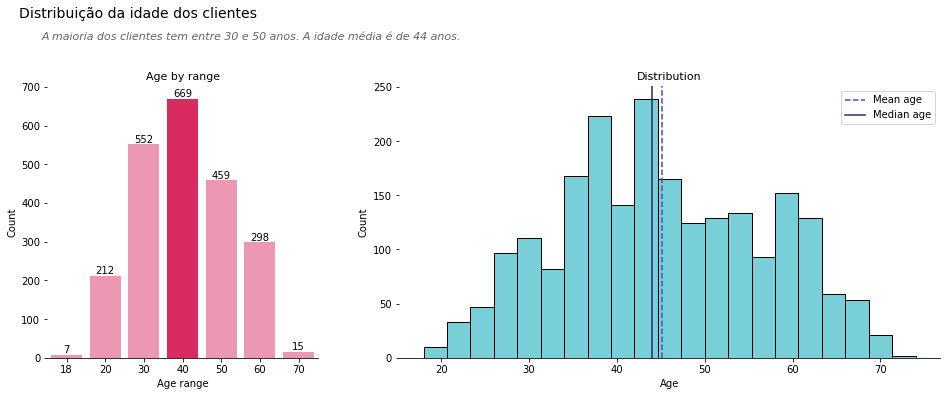

In [29]:
plot_data(df=data, 
          feature='Age', 
          titulo='Distribuição da idade dos clientes', 
          subtitulo='A maioria dos clientes tem entre 30 e 50 anos. A idade média é de 44 anos.', 
          cor=['#FB8AAC', '#FB8AAC', '#FB8AAC', '#F70E54', '#FB8AAC', '#FB8AAC', '#FB8AAC'], 
          plot_type='histogram2')

**Nota:**
- A maioria dos nossos clientes tem entre 30 e 50 anos. A distribuição da idade dos clientes é semelhante a uma forma de distribuição normal.

#### Agora, vamos traçar o nível de escolaridade dos clientes.

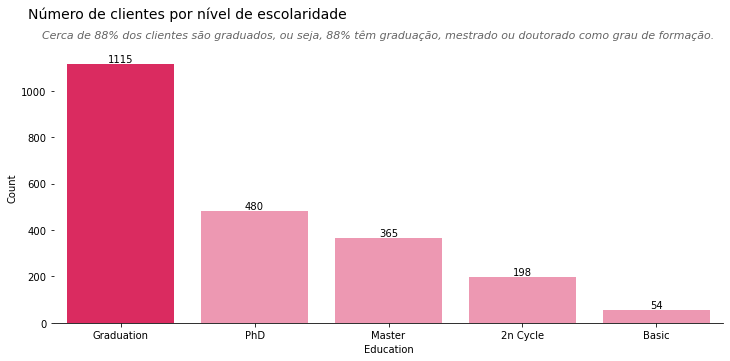

In [30]:
plot_data(df=data, 
          feature='Education', 
          titulo='Número de clientes por nível de escolaridade', 
          subtitulo='Cerca de 88% dos clientes são graduados, ou seja, 88% têm graduação, mestrado ou doutorado como grau de formação.', 
          cor=['#F70E54','#FB8AAC','#FB8AAC','#FB8AAC','#FB8AAC'], 
          plot_type='histogram1')

**Nota:**
- A maioria dos clientes possui graduação ou mais. Isso pode ser um reflexo da idade (e também das oportunidades): a maioria dos clientes tem 44 anos em média, então teve tempo de investir em educação.

#### Agora, vamos plotar a renda dos clientes:

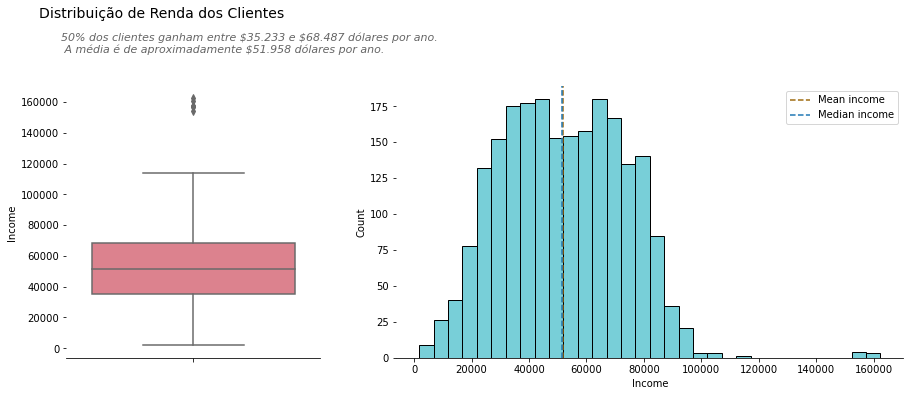

In [31]:
plot_data(df=data, 
          feature='Income', 
          titulo='Distribuição de Renda dos Clientes', 
          subtitulo= '50% dos clientes ganham entre \$35.233 e \$68.487 dólares por ano.\
  \n A média é de aproximadamente \$51.958 dólares por ano.', 
          cor='', 
          plot_type='boxhist')

**Nota:**
- Em média, os clientes têm 51.958 dólares de receita por ano. 
- 50% dos clientes ganham entre 35.233 e 68.487 dólares por ano. Existem alguns outliers, ou seja, pessoas que têm uma renda muito alta por ano.

#### Agora, vamos traçar o número de filhos dos clientes:

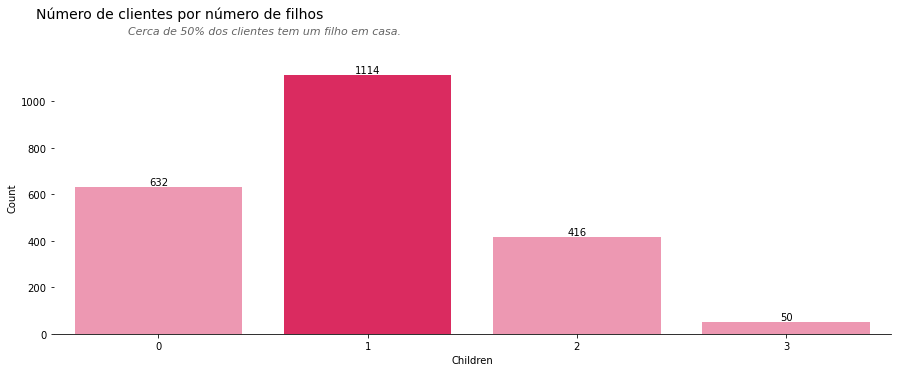

In [32]:
plot_data(df=data, 
          feature='Children', 
          titulo='Número de clientes por número de filhos', 
          subtitulo='Cerca de 50% dos clientes tem um filho em casa.', 
          cor=['#FB8AAC','#F70E54','#FB8AAC','#FB8AAC'], 
          plot_type='histogram')

**Nota:**
- Cerca de 28.57% dos clientes não têm filhos.
- 50% dos clientes tem um filho.
- 18% tem dois filhos.
- 2.2% dos clientes tem três.

#### Agora, vamos traçar o número de produtos vendidos:

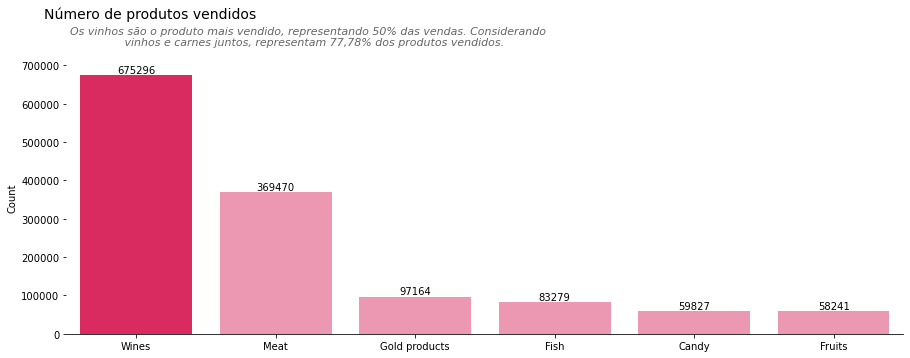

In [33]:
plot_data(df='', 
          feature='', 
          titulo='Número de produtos vendidos', 
          subtitulo='Os vinhos são o produto mais vendido, representando 50% das vendas. Considerando \n \
  vinhos e carnes juntos, representam 77,78% dos produtos vendidos.', 
          cor=['#F70E54','#FB8AAC','#FB8AAC','#FB8AAC','#FB8AAC','#FB8AAC'], 
          plot_type='histogram3')

**Nota:**
- Vinhos e carnes são os produtos mais vendidos. Não existe informação sobre a mercearia, mas podemos pensar que esta mercearia se foca mais nos vinhos e nos produtos à base de carne, pelo que isso explicaria a comercialização da maioria dos produtos desta categoria.

#### Agora, vamos plotar o número de promoções aceitas:

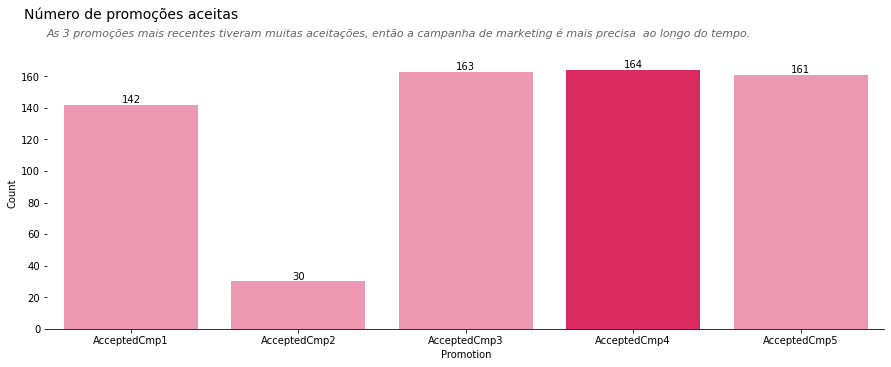

In [34]:
plot_data(df=data, 
          feature=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], 
          titulo='Número de promoções aceitas', 
          subtitulo='As 3 promoções mais recentes tiveram muitas aceitações, então a campanha de marketing é mais precisa\
  ao longo do tempo.', 
          cor=['#FB8AAC','#FB8AAC','#FB8AAC','#F70E54','#FB8AAC'], 
          plot_type='histogram4')

**Nota:**
- A segunda promoção foi um fracasso porque teve pouca aceitação, tendo em vista que a primeira promoção foi melhor que a segunda. 
- A terceira, quarta e última promoção foram boas, em geral - Então eles aprenderam como melhorar suas promoções e influenciar mais clientes.

#### Agora, vamos plotar a distribuição total gasta:

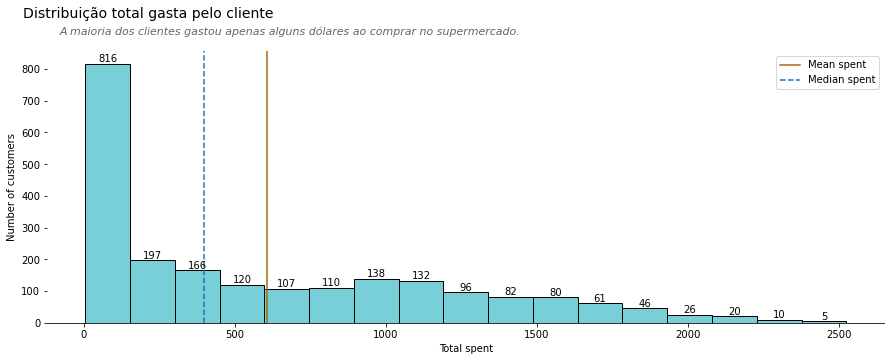

In [35]:
plot_data(df=data, 
          feature='TotalSpent', 
          titulo='Distribuição total gasta pelo cliente', 
          subtitulo='A maioria dos clientes gastou apenas alguns dólares ao comprar no supermercado.', 
          cor=['#E8E8E8','#51cedb','#E8E8E8','#E8E8E8'], 
          plot_type='histogram5')

**Nota:**
- A maioria dos clientes gastou apenas alguns dólares na compra de produtos. 50 por cento dos clientes gastaram até 397 dólares no supermercado.

#### Agora, vamos plotar a receita de recursos e o total gasto para analisar:

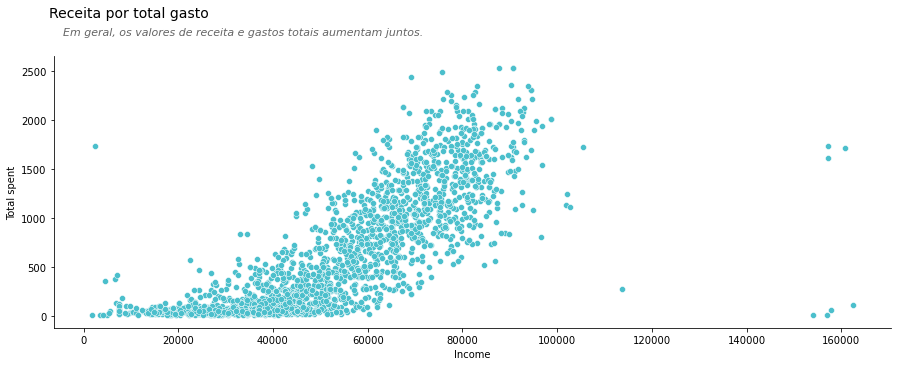

In [36]:
plot_data(df=data, 
          feature='Income', 
          titulo='Receita por total gasto', 
          subtitulo='Em geral, os valores de receita e gastos totais aumentam juntos.', 
          cor='', 
          plot_type='correlacao')

**Nota:**
- Á medida que a renda aumenta, o total gasto também tende a aumentar, principalmente acima de 60.000 dólares. Existem alguns pontos incomuns de alta renda e baixo total de pontos gastos, mas, em geral, ambos os recursos crescem juntos.

### <font color='#F37126'> 2.2. Variável People

In [37]:
people.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Complain'],
      dtype='object')

In [38]:
show_null(people)

,QTD,% null,Type
Income,24,0.010714,float64
ID,0,0.000000,int64
Year_Birth,0,0.000000,int64
Education,0,0.000000,object
Marital_Status,0,0.000000,object
Kidhome,0,0.000000,int64
Teenhome,0,0.000000,int64
Dt_Customer,0,0.000000,object
Recency,0,0.000000,int64
Complain,0,0.000000,int64


In [39]:
people.dropna(inplace=True)

In [40]:
people.Income.isnull().sum()

0

#### Income (Renda familiar anual do cliente)

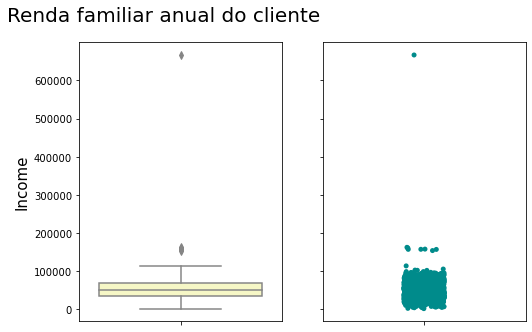

In [41]:
plot_num(people,'Income','Renda familiar anual do cliente')

**Nota:**
- No boxplot temos alguns valores que são outliers, está muito acima, não faz sentido em ter esses valores na base de dados.
- Então tudo que for acima de 200 mil podemos excluir.

In [42]:
people = people[people.Income < 200000]

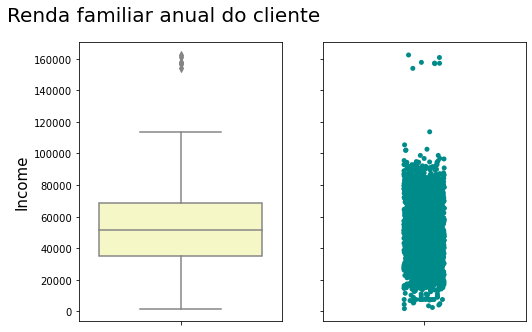

In [43]:
plot_num(people,'Income','Renda familiar anual do cliente')

**Nota:**
- Podemos ver no boxplot que 50% dos usuários ganham aproximadamente abaixo de 50 mil.

#### Year_Birth (Ano de nascimento do cliente)

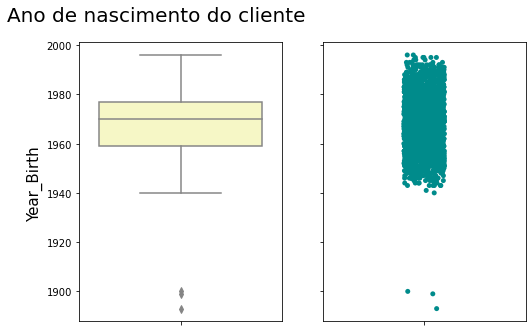

In [44]:
plot_num(people,'Year_Birth','Ano de nascimento do cliente')

**Nota:**
- No gráfico stripplot, podemos ver que temos três outliers, que estão com a data abaixo de 1900, provavelmente esses dados estão errados.
- Podemos optar em tirar esses valores.

In [45]:
people = people[people.Year_Birth > 1930]

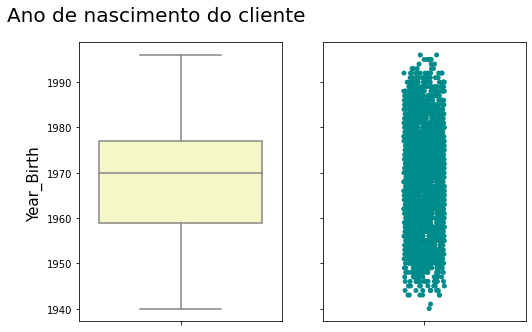

In [46]:
plot_num(people,'Year_Birth','Ano de nascimento do cliente')

#### Education (Nível de educação do cliente)

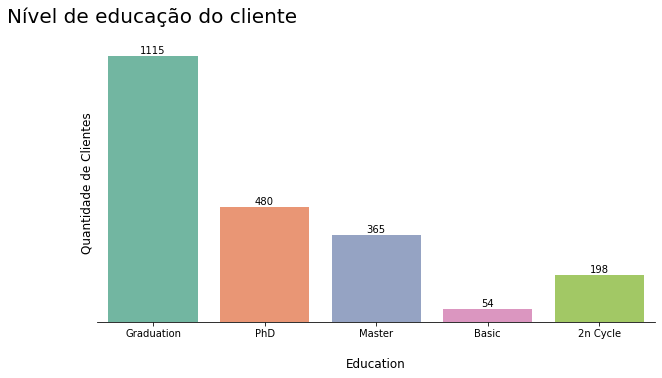

In [47]:
plot_cat(people,'Education','Nível de educação do cliente')

**Nota:**
- Quando a variável é categórica e ordinal, então precisamos transformar em números que Correspondam a hierarquia do nível da eduação.
    - 1ª Nível: Basic
    - 2ª Nível: 2n Cycle
    - 3ª Nível: Graduation
    - 4ª Nível: Master
    - 5ª Nível: PhD
    
- Vamos ter que fazer essa substituição.

In [48]:
people.Education = people.Education.apply(lambda x: 0 if x=='Basic' 
                       else(1 if x=='2n Cycle' 
                            else(2 if x=='Graduation' 
                                 else(3 if x =='Master' 
                                      else(4 if x=='PhD' else None)))))

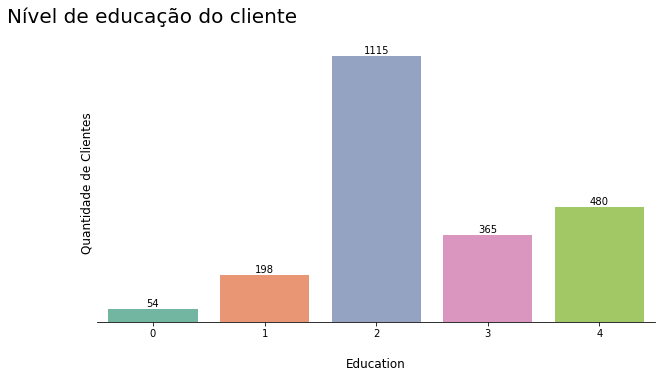

In [49]:
plot_cat(people,'Education','Nível de educação do cliente')

#### Marital_Status (Estado civel do cliente)

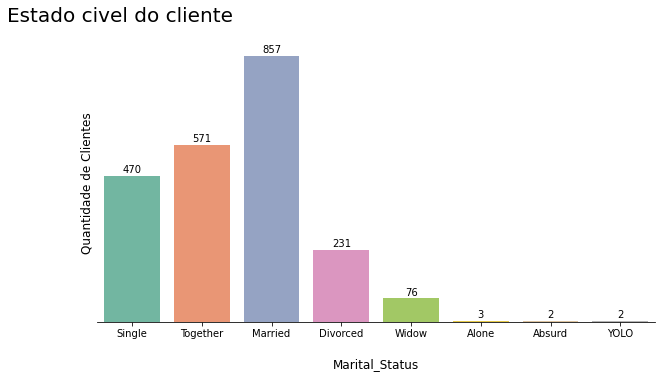

In [50]:
plot_cat(people,'Marital_Status','Estado civel do cliente')

**Nota:**

- Single - Solteiro
- Together - Junto
- Married - Casado
- Divorced - divorciado
- Widow - Viúva
- Alone - Sozinho
- Absurd - Pessos que não sabem exatamente o que é estado civil
- Yolo - Podemo interpretar como solteiro

Podemos juntar:
- Alone com Single
- Yolo com Single
- Together com Married
- Absurd podemos remover

In [51]:
people = people[people.Marital_Status != 'Absurd']

In [52]:
people.Marital_Status = people.Marital_Status.apply(lambda x: 'Single' if x=='Alone' 
                                                    else('Single' if x =='YOLO' 
                                                         else ('Together' if x == 'Married'
                                                              else x)))

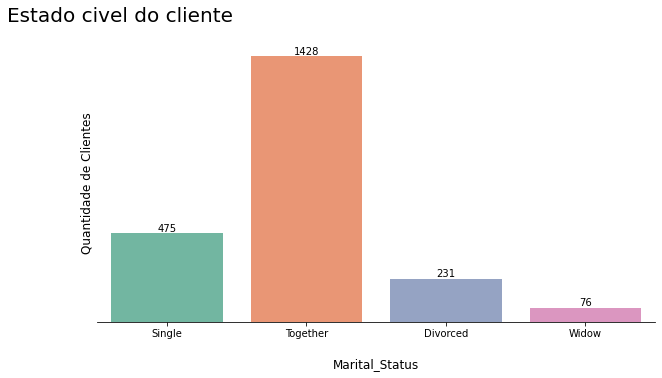

In [53]:
plot_cat(people,'Marital_Status','Estado civel do cliente')

**Nota:**
- Temos uma variável de texto, que vamos precisar fazer uma transformação.
- Nesta variável categórica, não tem uma hierarquia e quando temos uma variável categórica nominal, não substituimos por números, mas podemos fazer get_dummies, que vai transformar cada um deles em uma coluna.

#### Kidhome (Número de crianças dentro da casa do cliente)

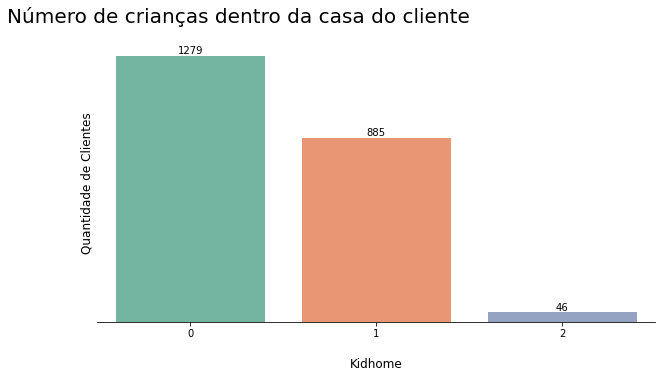

In [54]:
plot_cat(people,'Kidhome','Número de crianças dentro da casa do cliente')

#### Teenhome ( Número de adolescentes dentro da casa do cliente)

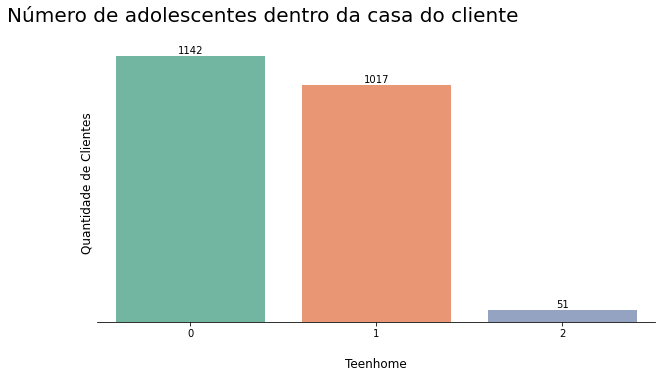

In [55]:
plot_cat(people,'Teenhome','Número de adolescentes dentro da casa do cliente')

**Nota:**
- 51 das pessoas que tem dois adolescentes em casa.
- Talvez para o negócio faça sentido juntar as duas variáveis (Teenhome/Kidhome).
- Então vamos juntar as duas e criar uma nova com o nome "ChildrenHome" e depois apagar "Teenhome/Kidhome".

#### ChildrenHome (Quantidade de crianças dentro da casa do cliente)

In [56]:
people['ChildrenHome'] = people.Kidhome + people.Teenhome

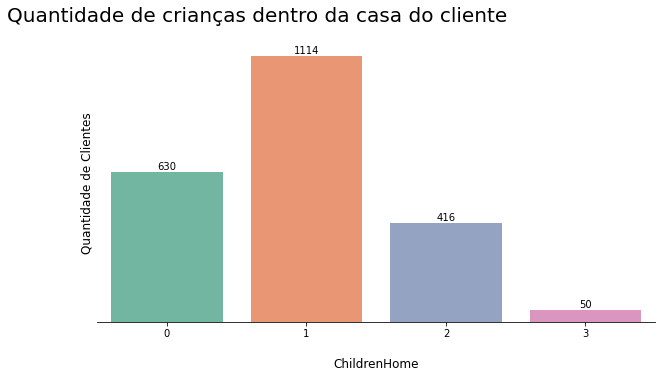

In [57]:
plot_cat(people,'ChildrenHome','Quantidade de crianças dentro da casa do cliente')

In [58]:
people.drop(columns=['Kidhome','Teenhome'],inplace=True)

In [59]:
people.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,ChildrenHome
0,5524,1957,2,Single,58138.0,04-09-2012,58,0,0
1,2174,1954,2,Single,46344.0,08-03-2014,38,0,2
2,4141,1965,2,Together,71613.0,21-08-2013,26,0,0
3,6182,1984,2,Together,26646.0,10-02-2014,26,0,1
4,5324,1981,4,Together,58293.0,19-01-2014,94,0,1


#### Dt_Customer (Data de cadastro do cliente na empresa)

In [60]:
people.dtypes

ID                  int64
Year_Birth          int64
Education           int64
Marital_Status     object
Income            float64
Dt_Customer        object
Recency             int64
Complain            int64
ChildrenHome        int64
dtype: object

In [61]:
# Transformando em Data
people.Dt_Customer = pd.to_datetime(people.Dt_Customer, dayfirst=True)

In [62]:
people.dtypes

ID                         int64
Year_Birth                 int64
Education                  int64
Marital_Status            object
Income                   float64
Dt_Customer       datetime64[ns]
Recency                    int64
Complain                   int64
ChildrenHome               int64
dtype: object

In [63]:
people.Dt_Customer.min()

Timestamp('2012-07-30 00:00:00')

In [64]:
people.Dt_Customer.max()

Timestamp('2014-06-29 00:00:00')

**Nota:**
- Essa data de 2014-06-29, parece representar o último dia de cadastro.
- Como podemos saber de quando é esse dataset, quando ele foi salvo, quando ele foi extraido?
    - Não da para saber.
    - E as vezes isso acontece, nem sempre vamos ter todas as informações do conjunto de dados.
    
- Nós temos uma variável chamada de Recency que é o número de dias desde que o cliente fez a última compra.
    - Então podemos concluir que pelo menos o último dia desde dataset é a data de cadastro do usuário mais (+) a quantidade de dias de Recency que é o número de dias desde que o cliente fez a última compra.
    - Então a data de cadastro tem que ser o maior valor de Dt_Customer + Recency.
    

Tudo isso é porque precisamos criar uma variável, life time, para saber qual é o tempo de vida do cliente na plataforma, mas só podemos calcular o tempo de vida com uma referência de data. 

In [65]:
(people['Dt_Customer'] + pd.to_timedelta(people['Recency'], unit='d')).max()

Timestamp('2014-10-04 00:00:00')

In [66]:
people['LifeTime'] = (pd.to_datetime('2014-10-05') - people['Dt_Customer']).dt.days/30

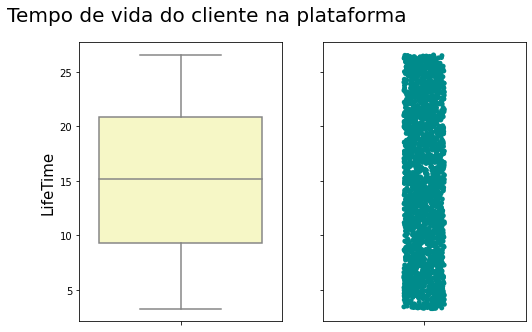

In [67]:
plot_num(people, 'LifeTime', 'Tempo de vida do cliente na plataforma')

In [68]:
people.drop(columns=['Dt_Customer'],inplace=True)

In [69]:
people.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Recency',
       'Complain', 'ChildrenHome', 'LifeTime'],
      dtype='object')

#### Recency (Número de dias desde a última compra do usuário)

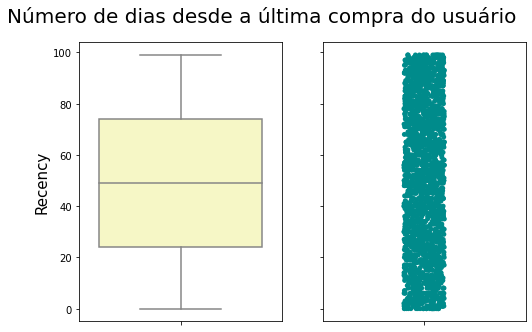

In [70]:
plot_num(people,'Recency','Número de dias desde a última compra do usuário')

#### Complain (Nível de reclamação dos clientes nos últimos dois anos)

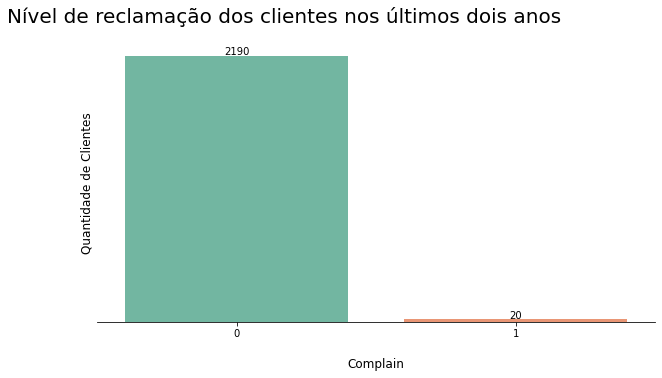

In [71]:
plot_cat(people,'Complain','Nível de reclamação dos clientes nos últimos dois anos')

**Nota:**
- Temos somente 20 pessoas que reclamaram de alguma coisa.
- Não temos muitas pessoas que reclamaram, então podemos decidir em tirar.

In [72]:
people.drop(columns=['Complain'], inplace=True)

In [73]:
people.head()

,ID,Year_Birth,Education,Marital_Status,Income,Recency,ChildrenHome,LifeTime
0,5524,1957,2,Single,58138.0,58,0,25.366667
1,2174,1954,2,Single,46344.0,38,2,7.033333
2,4141,1965,2,Together,71613.0,26,0,13.666667
3,6182,1984,2,Together,26646.0,26,1,7.900000
4,5324,1981,4,Together,58293.0,94,1,8.633333


In [74]:
people.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Recency',
       'ChildrenHome', 'LifeTime'],
      dtype='object')

### <font color='#F37126'> 2.3. Variável Products

In [75]:
products.columns

Index(['ID', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'],
      dtype='object')

In [76]:
show_null(products)

,QTD,% null,Type
ID,0,0.0,int64
MntWines,0,0.0,int64
MntFruits,0,0.0,int64
MntMeatProducts,0,0.0,int64
MntFishProducts,0,0.0,int64
MntSweetProducts,0,0.0,int64
MntGoldProds,0,0.0,int64


#### MntWines (Valor gasto em vinho nos últimos 2 anos)

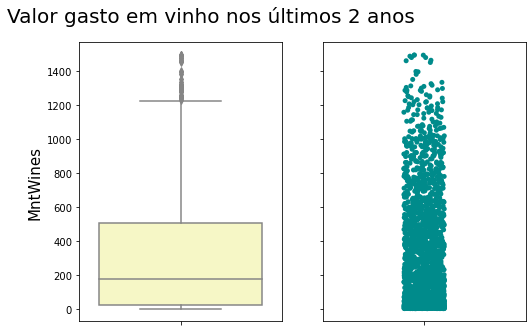

In [77]:
plot_num(products,'MntWines','Valor gasto em vinho nos últimos 2 anos')

#### MntFruits (Valor gasto com frutas nos últimos 2 anos)

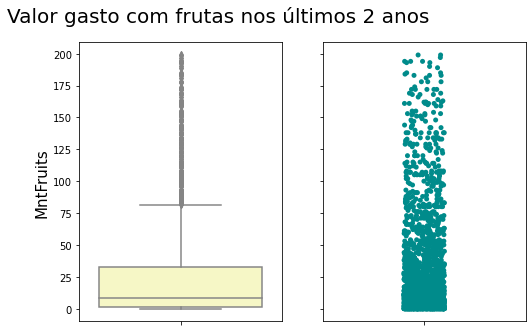

In [78]:
plot_num(products,'MntFruits','Valor gasto com frutas nos últimos 2 anos')

#### MntMeatProducts (Valor gasto com carne nos últimos 2 anos)

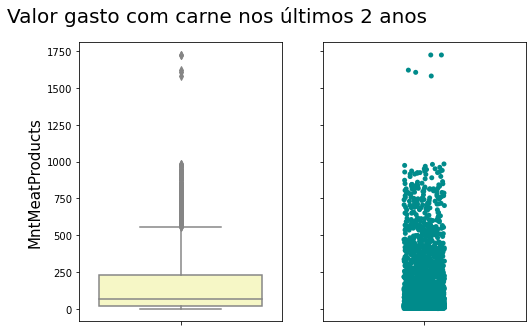

In [79]:
plot_num(products,'MntMeatProducts','Valor gasto com carne nos últimos 2 anos')

#### MntFishProducts (Valor gasto com pescado nos últimos 2 anos)

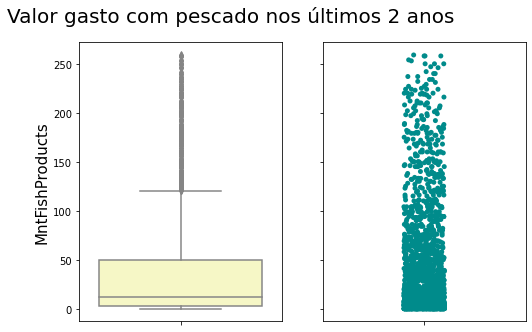

In [80]:
plot_num(products,'MntFishProducts','Valor gasto com pescado nos últimos 2 anos')

#### MntSweetProducts ( Valor gasto em doces nos últimos 2 anos)

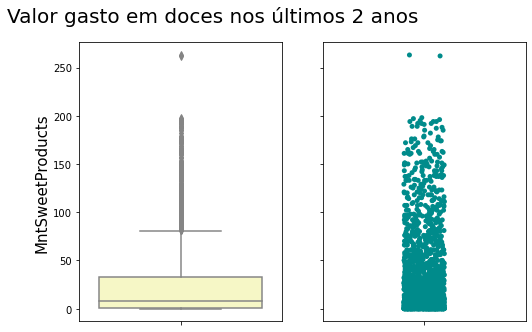

In [81]:
plot_num(products,'MntSweetProducts','Valor gasto em doces nos últimos 2 anos')

#### MntGoldProds (Valor gasto em ouro nos últimos 2 anos)

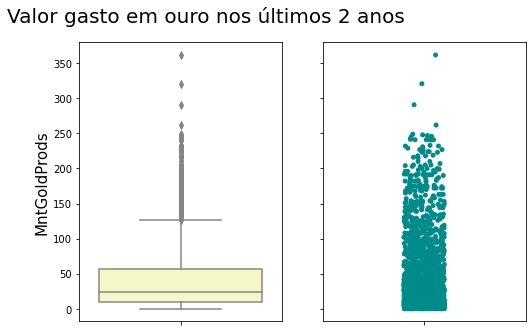

In [82]:
plot_num(products,'MntGoldProds','Valor gasto em ouro nos últimos 2 anos')

**Nota:**
- Todas essas variáveis podemos ver a presença de outliers: 
    - MntWines
    - MntFruits
    - MntMeatProducts
    - MntFishProducts
    - MntSweetProducts
    - MntGoldProds
- Podemos testar a criação de uma variável, onde vamos somar todas as quatidades.

In [83]:
products['TotalAmountSpent'] = products.MntFishProducts + products.MntFruits + products.MntGoldProds \
+ products.MntMeatProducts + products.MntSweetProducts + products.MntWines

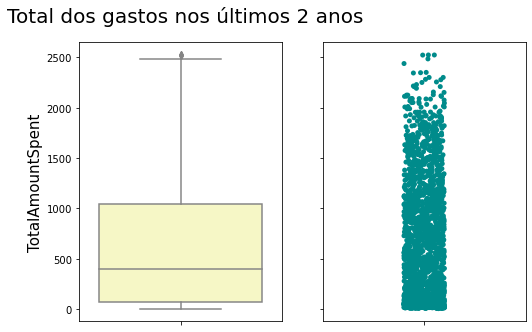

In [84]:
plot_num(products,'TotalAmountSpent','Total dos gastos nos últimos 2 anos')

**Nota:**
- Podemos ver que agora temos poucos valores outliers, talvez somente três.
- Vamos manter essa variável e as outras vamos mudar para porcentagens.

In [85]:
products.MntFishProducts = products.MntFishProducts/products['TotalAmountSpent']
products.MntFruits = products.MntFruits/products['TotalAmountSpent']
products.MntGoldProds = products.MntGoldProds/products['TotalAmountSpent']
products.MntMeatProducts = products.MntMeatProducts/products['TotalAmountSpent']
products.MntSweetProducts = products.MntSweetProducts/products['TotalAmountSpent']
products.MntWines = products.MntWines/products['TotalAmountSpent']

In [86]:
products.describe()

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalAmountSpent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,0.458481,0.049505,0.249508,0.071532,0.050777,0.120196,605.798214
std,3246.662198,0.228411,0.055867,0.126633,0.077909,0.061184,0.108988,602.249288
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,2828.250000,0.289506,0.008924,0.156250,0.012571,0.008621,0.038095,68.750000
50%,5458.500000,0.457482,0.029840,0.233447,0.048193,0.033333,0.086294,396.000000
75%,8427.750000,0.639143,0.070237,0.328227,0.104703,0.070411,0.169768,1045.500000
max,11191.000000,0.963303,0.445545,0.997110,0.590909,0.945848,0.894150,2525.000000


In [87]:
products.head()

,ID,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalAmountSpent
0,5524,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,1617
1,2174,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,27
2,4141,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,776
3,6182,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,53
4,5324,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,422


### <font color='#F37126'> 2.4. Variável Promotion

In [88]:
promotion.columns

Index(['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'Response'],
      dtype='object')

In [89]:
show_null(promotion)

,QTD,% null,Type
ID,0,0.0,int64
AcceptedCmp1,0,0.0,int64
AcceptedCmp2,0,0.0,int64
AcceptedCmp3,0,0.0,int64
AcceptedCmp4,0,0.0,int64
AcceptedCmp5,0,0.0,int64
Response,0,0.0,int64


#### Criação de uma variável, para somar todas as variáveis de campanhas

In [90]:
promotion['AcceptedCmp'] = promotion.AcceptedCmp1 + promotion.AcceptedCmp2 + promotion.AcceptedCmp3 + promotion.AcceptedCmp4 + \
promotion.AcceptedCmp5 + promotion.Response

In [91]:
promotion['AcceptedCmp'].describe()

count    2240.000000
mean        0.446875
std         0.890543
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: AcceptedCmp, dtype: float64

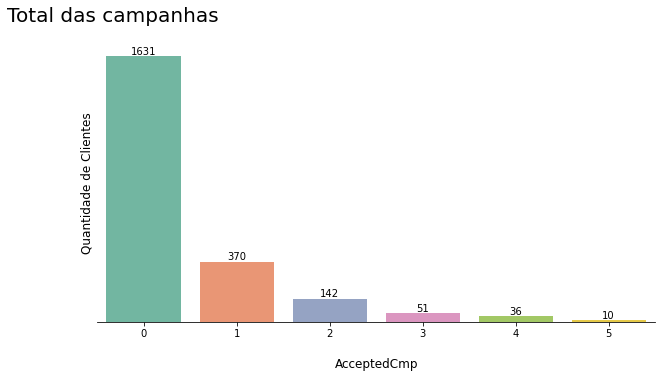

In [92]:
plot_cat(promotion,'AcceptedCmp','Total das campanhas')

In [93]:
# Esse é o dataset final
promotion = promotion[['ID', 'AcceptedCmp']]

In [94]:
promotion.head()

,ID,AcceptedCmp
0,5524,1
1,2174,0
2,4141,0
3,6182,0
4,5324,0


### <font color='#F37126'> 2.5. Variável Place

In [95]:
place.columns

Index(['ID', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumDealsPurchases', 'NumWebVisitsMonth'],
      dtype='object')

In [96]:
show_null(place)

,QTD,% null,Type
ID,0,0.0,int64
NumWebPurchases,0,0.0,int64
NumCatalogPurchases,0,0.0,int64
NumStorePurchases,0,0.0,int64
NumDealsPurchases,0,0.0,int64
NumWebVisitsMonth,0,0.0,int64


**Nota:**
- Assim como foi feito para a quantidade gasta, vamos fazer a mesma coisa, criar uma variável para a quantidade total de compras realizadas por clientes "TotalPurchases".

In [97]:
place['TotalPurchases'] = place.NumWebPurchases + place.NumCatalogPurchases + place.NumStorePurchases

In [98]:
place.describe()

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,4.084821,2.662054,5.790179,2.325000,5.316518,12.537054
std,3246.662198,2.778714,2.923101,3.250958,1.932238,2.426645,7.205741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,2.000000,0.000000,3.000000,1.000000,3.000000,6.000000
50%,5458.500000,4.000000,2.000000,5.000000,2.000000,6.000000,12.000000
75%,8427.750000,6.000000,4.000000,8.000000,3.000000,7.000000,18.000000
max,11191.000000,27.000000,28.000000,13.000000,15.000000,20.000000,32.000000


**Nota:**
- Podemos ver que temos uma quantidade alta de clientes que não gastaram nada.
- Podemos ver a quantos são os clientes que não compraram nada.

In [99]:
place[place.TotalPurchases == 0]

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases
655,5555,0,0,0,0,0,0
981,3955,0,0,0,0,14,0
1245,6862,0,0,0,15,20,0
1524,11110,0,0,0,0,14,0
1846,9931,0,0,0,15,19,0
2132,11181,0,0,0,0,0,0


**Nota:**
- Podemos ver que são poucos registros
- Temos dois registros estranhos, como podemos ter um total de compra está igual a zero, mas mostra 15 compras em promoção, sendo que a quantidade de compra em promoção deveria ser uma parcela do total de compras feitas na Web, Catálogo e também nas lojas físicas, então esses dados vão poluir o dataset.
- Vamos excluir esses registros.

In [100]:
place = place[place['TotalPurchases'] > 0]

**Nota:**
- Agora podemos fazer a porcentagens de compra para essas variáveis:
    - NumWebPurchases
    - NumCatalogPurchases
    - NumStorePurchases
    - NumDealsPurchases

In [101]:
place['NumWebPurchases'] = place['NumWebPurchases']/place['TotalPurchases']
place['NumCatalogPurchases'] = place['NumCatalogPurchases']/place['TotalPurchases']
place['NumStorePurchases'] = place['NumStorePurchases']/place['TotalPurchases']
place['NumDealsPurchases'] = place['NumDealsPurchases']/place['TotalPurchases']

In [102]:
place.describe()

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases
count,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000,2234.000000
mean,5585.427037,0.329874,0.164809,0.505317,0.247963,5.300806,12.570725
std,3245.168172,0.121858,0.140668,0.149485,0.356679,2.372957,7.186011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2817.750000,0.250000,0.000000,0.401852,0.083333,3.000000,6.000000
50%,5453.500000,0.333333,0.150000,0.500000,0.200000,6.000000,12.000000
75%,8419.500000,0.400000,0.250000,0.600000,0.333333,7.000000,18.000000
max,11191.000000,1.000000,1.000000,1.000000,15.000000,20.000000,32.000000


**Nota:**
- Seria estranho ter alguma variável acima de 100%.
- A variável "NumDealsPurchases" está indo até 15, e deveria ir até a 100%.

In [103]:
place[place.NumDealsPurchases > 1]

,ID,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases
1042,10749,0.0,1.0,0.0,15.0,19,1


**Nota:**
- Realmente esse dado tem algum erro, vamos ter que excluir esse registro para não atrapalhar a clusterização.

In [104]:
place = place[place['NumDealsPurchases'] <= 1]

#### NumWebPurchases (Número de compras realizadas através do site da empresa)

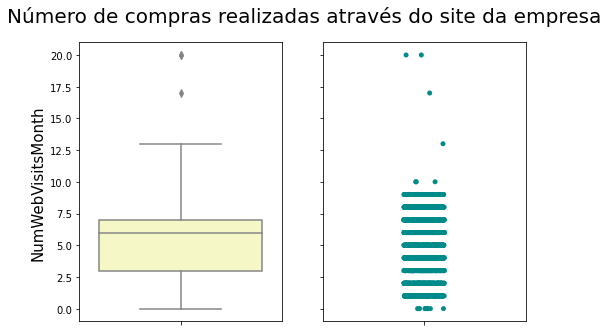

In [105]:
plot_num(place,'NumWebVisitsMonth','Número de compras realizadas através do site da empresa')

**Nota:**
- Temos um ou dois outliers e vamos manter esses dados, porque não são muitos.
- Também é possível que tem algum usuário acessando demais o Web site. 

# <font color='red'> 5 - PRÉ-PROCESSAMENTO

### <font color='#F37126'> 5.1. Juntando os Dados

In [106]:
# Juntando Dados
df_lista = [people, products, promotion, place]

In [107]:
df_final = reduce(lambda df1, df2: pd.merge(df1, df2, on='ID'), df_lista)

In [108]:
df_final.shape

(2203, 22)

In [109]:
print(df_final.columns.to_list())

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Recency', 'ChildrenHome', 'LifeTime', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'TotalAmountSpent', 'AcceptedCmp', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'NumWebVisitsMonth', 'TotalPurchases']


In [110]:
# Remover o ID, porque usamos ele para fazer somente o relacionamento, ele não é uma variável caracteristica do usuário
df_final.drop(columns=['ID'], inplace=True)

In [111]:
show_null(df_final)

,QTD,% null,Type
Year_Birth,0,0.0,int64
MntSweetProducts,0,0.0,float64
NumWebVisitsMonth,0,0.0,int64
NumDealsPurchases,0,0.0,float64
NumStorePurchases,0,0.0,float64
NumCatalogPurchases,0,0.0,float64
NumWebPurchases,0,0.0,float64
AcceptedCmp,0,0.0,int64
TotalAmountSpent,0,0.0,int64
MntGoldProds,0,0.0,float64


### <font color='#F37126'> 5.2. Normalização

In [112]:
df_final.head()

,Year_Birth,Education,Marital_Status,Income,Recency,ChildrenHome,LifeTime,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalAmountSpent,AcceptedCmp,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases
0,1957,2,Single,58138.0,58,0,25.366667,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,1617,1,0.363636,0.454545,0.181818,0.136364,7,22
1,1954,2,Single,46344.0,38,2,7.033333,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,27,0,0.250000,0.250000,0.500000,0.500000,5,4
2,1965,2,Together,71613.0,26,0,13.666667,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,776,0,0.400000,0.100000,0.500000,0.050000,4,20
3,1984,2,Together,26646.0,26,1,7.900000,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,53,0,0.333333,0.000000,0.666667,0.333333,6,6
4,1981,4,Together,58293.0,94,1,8.633333,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,422,0,0.357143,0.214286,0.428571,0.357143,5,14


In [113]:
df_final = pd.get_dummies(df_final)

In [114]:
df_final.head()

,Year_Birth,Education,Income,Recency,ChildrenHome,LifeTime,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalAmountSpent,AcceptedCmp,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1957,2,58138.0,58,0,25.366667,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,1617,1,0.363636,0.454545,0.181818,0.136364,7,22,0,1,0,0
1,1954,2,46344.0,38,2,7.033333,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,27,0,0.250000,0.250000,0.500000,0.500000,5,4,0,1,0,0
2,1965,2,71613.0,26,0,13.666667,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,776,0,0.400000,0.100000,0.500000,0.050000,4,20,0,0,1,0
3,1984,2,26646.0,26,1,7.900000,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,53,0,0.333333,0.000000,0.666667,0.333333,6,6,0,0,1,0
4,1981,4,58293.0,94,1,8.633333,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,422,0,0.357143,0.214286,0.428571,0.357143,5,14,0,0,1,0


In [115]:
df_final.shape

(2203, 24)

**Nota:**
- Podemos observar uma grande diferença de escala entre este valores, e como vamos trabalhar com o algoritmo k-means, onde ele vai fazer o cálculo de distância utilizando a fórmula de Euclidiana, e se deixar os valores com essa diferença ele vai considerar um atributo mais importante que o outro, por essa razão precisamos deixar todos na mesma escala.

In [116]:
scaled_df = scaler(df_final)

In [117]:
scaled_df.describe()

,Year_Birth,Education,Income,Recency,ChildrenHome,LifeTime,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalAmountSpent,AcceptedCmp,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
count,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000
mean,0.516179,0.615070,0.309517,0.494858,0.316689,0.506590,0.477108,0.110423,0.249853,0.120857,0.053607,0.134151,0.238604,0.089877,0.330002,0.164580,0.505419,0.241032,0.265138,0.374255,0.103495,0.214707,0.647299,0.034498
std,0.208790,0.251205,0.132629,0.292626,0.249584,0.289392,0.237445,0.124819,0.126184,0.132076,0.064434,0.121894,0.239412,0.178555,0.120862,0.139301,0.148665,0.172198,0.117599,0.231731,0.304674,0.410712,0.477919,0.182547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339286,0.500000,0.205796,0.242424,0.000000,0.258941,0.301382,0.020003,0.156637,0.021255,0.009126,0.042521,0.024235,0.000000,0.250000,0.000000,0.400000,0.083333,0.150000,0.161290,0.000000,0.000000,0.000000,0.000000
50%,0.535714,0.500000,0.305883,0.494949,0.333333,0.509299,0.477821,0.066438,0.234010,0.081269,0.034950,0.094632,0.154946,0.000000,0.333333,0.150000,0.500000,0.200000,0.300000,0.354839,0.000000,0.000000,1.000000,0.000000
75%,0.660714,0.750000,0.412801,0.747475,0.333333,0.756795,0.666694,0.155363,0.329124,0.175066,0.074329,0.189881,0.413190,0.200000,0.400000,0.250000,0.600000,0.333333,0.350000,0.580645,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### <font color='#F37126'> 5.3. Método de Elbow

In [118]:
# Cálculo para encontrar qual o cluster ideal
inertia = []
num_clusters = range(1, 14) # vamos cálcular para 14 clusters

for k in num_clusters:
    Model = KMeans(n_clusters=k) # Criando um objeto tipo k-means
    Model.fit(scaled_df) # Gera o grupo
    inertia.append(Model.inertia_) # Aqui adicionamos o valor wcss na lista que está dentro do parâmetro 'inertia_'

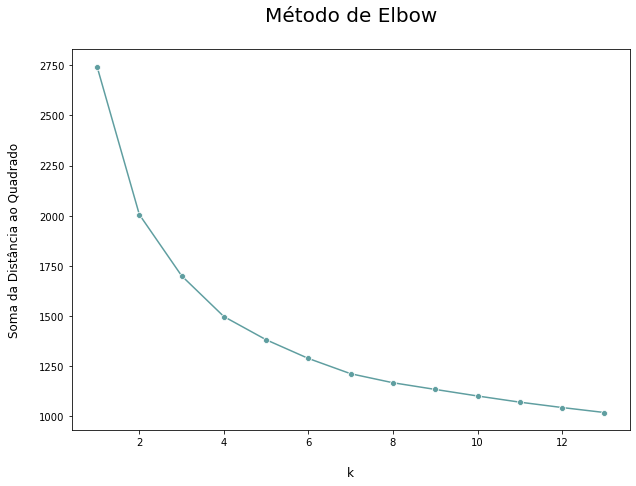

In [119]:
# Visualização gráfica para aplicar “ELBOW METHOD” (MÉTODO DO COTOVELO)
plt.figure(figsize=(10,7))
sns.lineplot(x=num_clusters, y=inertia, color='cadetblue', marker='o')
plt.xlabel('\nk', size=12)
plt.ylabel('Soma da Distância ao Quadrado\n', size=12)
plt.title('Método de Elbow\n', size=20)
plt.show()

**Nota:**
- Podemos concluir que utilizando esse método do cotovelo, o número ideal de clusters é igual a 4.

### <font color='#F37126'> 5.4. Alocação de Pesos

Essa parte é feita com o time de negócio, porque para eles algumas variáveis são mais importantes para influênciar a busca pelos clusters.

In [120]:
print(scaled_df.columns.to_list())

['Year_Birth', 'Education', 'Income', 'Recency', 'ChildrenHome', 'LifeTime', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'TotalAmountSpent', 'AcceptedCmp', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'NumWebVisitsMonth', 'TotalPurchases', 'Marital_Status_Divorced', 'Marital_Status_Single', 'Marital_Status_Together', 'Marital_Status_Widow']


In [121]:
# As variáveis onde vamos colocar um peso

# Dinheiro gasto pelo cliente, essa variável mais importante e quero que ela venha se destacar
scaled_df.TotalAmountSpent = 8*scaled_df.TotalAmountSpent
# Todas compras feita pelo cliente, ou seja, número de compras
scaled_df.TotalPurchases = 6*scaled_df.TotalPurchases
# Número de dias desde a última compra do usuário
scaled_df.Recency = 4*scaled_df.Recency
# Número de visitas feita pelo usuário
scaled_df.NumWebVisitsMonth = 4*scaled_df.NumWebVisitsMonth
# Salário anual de cada cliente 
scaled_df.Income = 4*scaled_df.Income
# Tempo em que o cliente está cadastrado na plataforma
scaled_df.LifeTime = 4*scaled_df.LifeTime
# Idade do cliente, pode fazer alguma diferença na clusterização
scaled_df.Year_Birth = 2*scaled_df.Year_Birth
# Quantidade de filhos em casa
scaled_df.ChildrenHome = 2*scaled_df.ChildrenHome
# Educação
scaled_df.Education = 2*scaled_df.Education

In [122]:
scaled_df.describe()

,Year_Birth,Education,Income,Recency,ChildrenHome,LifeTime,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalAmountSpent,AcceptedCmp,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
count,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000
mean,1.032358,1.230141,1.238068,1.979431,0.633379,2.026362,0.477108,0.110423,0.249853,0.120857,0.053607,0.134151,1.908833,0.089877,0.330002,0.164580,0.505419,0.241032,1.060554,2.245530,0.103495,0.214707,0.647299,0.034498
std,0.417580,0.502410,0.530515,1.170504,0.499168,1.157569,0.237445,0.124819,0.126184,0.132076,0.064434,0.121894,1.915298,0.178555,0.120862,0.139301,0.148665,0.172198,0.470396,1.390384,0.304674,0.410712,0.477919,0.182547
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.678571,1.000000,0.823182,0.969697,0.000000,1.035765,0.301382,0.020003,0.156637,0.021255,0.009126,0.042521,0.193882,0.000000,0.250000,0.000000,0.400000,0.083333,0.600000,0.967742,0.000000,0.000000,0.000000,0.000000
50%,1.071429,1.000000,1.223532,1.979798,0.666667,2.037196,0.477821,0.066438,0.234010,0.081269,0.034950,0.094632,1.239571,0.000000,0.333333,0.150000,0.500000,0.200000,1.200000,2.129032,0.000000,0.000000,1.000000,0.000000
75%,1.321429,1.500000,1.651204,2.989899,0.666667,3.027182,0.666694,0.155363,0.329124,0.175066,0.074329,0.189881,3.305522,0.200000,0.400000,0.250000,0.600000,0.333333,1.400000,3.483871,0.000000,0.000000,1.000000,0.000000
max,2.000000,2.000000,4.000000,4.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000


**Nota:**
- Podemos ver que temos variáveis com valores diferentes.

# <font color='red'> 6 - TREINAMENTO ALGORITMOS DE MACHINE LEARNING

### <font color='#F37126'> 6.1. K-MEANS

Algoritmo não supervisionado (clustering - agrupamento)
- Algoritmo não supervisionado indica que nós não temos uma classe, objetivo é não fazer previsões, mas a ideia é agrupar os dados baseado em atributos similares, por meio do cálculo da Distância Euclidiana que é uma fórmula matemática que vai medir o quanto dois pontos são parecidos, quanto mais parecidos, mas esses dados têm a tendência a pertencerem ao mesmo grupo.

In [123]:
# Criando a variável que vai fazer o agrupamento
Model = KMeans(n_clusters=4)

In [124]:
# Treinamento do algoritmo k-means, para colocar cada um dos registros em um dos 4 grupos
clusters = Model.fit_predict(scaled_df)

In [125]:
clusters

array([1, 2, 3, ..., 3, 3, 2])

In [126]:
df_final['cluster'] = clusters

In [127]:
# Temos clusters para cada usuário
df_final

,Year_Birth,Education,Income,Recency,ChildrenHome,LifeTime,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalAmountSpent,AcceptedCmp,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,cluster
0,1957,2,58138.0,58,0,25.366667,0.392703,0.054422,0.337662,0.106370,0.054422,0.054422,1617,1,0.363636,0.454545,0.181818,0.136364,7,22,0,1,0,0,1
1,1954,2,46344.0,38,2,7.033333,0.407407,0.037037,0.222222,0.074074,0.037037,0.222222,27,0,0.250000,0.250000,0.500000,0.500000,5,4,0,1,0,0,2
2,1965,2,71613.0,26,0,13.666667,0.548969,0.063144,0.163660,0.143041,0.027062,0.054124,776,0,0.400000,0.100000,0.500000,0.050000,4,20,0,0,1,0,3
3,1984,2,26646.0,26,1,7.900000,0.207547,0.075472,0.377358,0.188679,0.056604,0.094340,53,0,0.333333,0.000000,0.666667,0.333333,6,6,0,0,1,0,2
4,1981,4,58293.0,94,1,8.633333,0.409953,0.101896,0.279621,0.109005,0.063981,0.035545,422,0,0.357143,0.214286,0.428571,0.357143,5,14,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,1967,2,61223.0,46,1,15.966667,0.528710,0.032066,0.135720,0.031320,0.087994,0.184191,1341,0,0.562500,0.187500,0.250000,0.125000,5,16,0,0,1,0,1
2199,1946,4,64014.0,56,3,3.900000,0.914414,0.000000,0.067568,0.000000,0.000000,0.018018,444,1,0.533333,0.133333,0.333333,0.466667,7,15,0,0,1,0,3
2200,1981,2,56981.0,91,0,8.433333,0.731668,0.038678,0.174859,0.025786,0.009670,0.019339,1241,1,0.111111,0.166667,0.722222,0.055556,6,18,1,0,0,0,3
2201,1956,3,69245.0,8,1,8.466667,0.507711,0.035587,0.253855,0.094899,0.035587,0.072361,843,0,0.285714,0.238095,0.476190,0.095238,3,21,0,0,1,0,3


### <font color='#F37126'> 6.2. Salvando o modelo

In [128]:
# save the model to disk
filename = 'modelo_finalizado.sav'
pickle.dump(Model, open(filename, 'wb'))

In [129]:
# load the model from disk
Model = pickle.load(open(filename, 'rb'))

# <font color='red'> 7 - AVALIAÇÃO DO ALGORITMO

### <font color='#F37126'> 7.1. Análise dos Clusters

In [130]:
# Quantas pessoas tem em cada cluster
df_final.cluster.value_counts()

3    636
2    590
0    568
1    409
Name: cluster, dtype: int64

In [131]:
# Média para cada uma das variáveis
df_final.groupby('cluster').mean()

,Year_Birth,Education,Income,Recency,ChildrenHome,LifeTime,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalAmountSpent,AcceptedCmp,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,1970.096831,2.320423,36556.424296,74.721831,1.279930,14.519073,0.397451,0.054050,0.246382,0.078906,0.057597,0.165613,131.633803,0.123239,0.349958,0.089438,0.560604,0.346875,6.376761,6.744718,0.103873,0.214789,0.660211,0.021127
1,1968.635697,2.579462,77250.303178,51.024450,0.298289,17.101711,0.498636,0.040362,0.308446,0.058682,0.042722,0.051153,1614.982885,1.251834,0.276851,0.309746,0.413403,0.083018,3.479218,20.364303,0.105134,0.249389,0.611247,0.034230
2,1971.228814,2.388136,36586.594915,23.693220,1.216949,14.027966,0.420934,0.054209,0.225955,0.081454,0.052957,0.164492,128.093220,0.261017,0.346617,0.081892,0.571491,0.335929,6.366102,6.618644,0.094915,0.225424,0.650847,0.028814
3,1965.861635,2.575472,63694.421384,48.171384,0.827044,15.222904,0.525868,0.045900,0.234942,0.063601,0.047593,0.082096,833.020440,0.399371,0.330946,0.215041,0.454014,0.160086,4.529874,18.391509,0.110063,0.182390,0.655660,0.051887


**Nota:**
- Year_Birth: O **cluster 3** é onde está as pessoas mais velhas
- Education: O maior nível é o **cluster 1**
- Income: O maior divedendo é o **cluster 1**

In [132]:
df_final.groupby('cluster').mean()

,Year_Birth,Education,Income,Recency,ChildrenHome,LifeTime,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,TotalAmountSpent,AcceptedCmp,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumWebVisitsMonth,TotalPurchases,Marital_Status_Divorced,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,1970.096831,2.320423,36556.424296,74.721831,1.279930,14.519073,0.397451,0.054050,0.246382,0.078906,0.057597,0.165613,131.633803,0.123239,0.349958,0.089438,0.560604,0.346875,6.376761,6.744718,0.103873,0.214789,0.660211,0.021127
1,1968.635697,2.579462,77250.303178,51.024450,0.298289,17.101711,0.498636,0.040362,0.308446,0.058682,0.042722,0.051153,1614.982885,1.251834,0.276851,0.309746,0.413403,0.083018,3.479218,20.364303,0.105134,0.249389,0.611247,0.034230
2,1971.228814,2.388136,36586.594915,23.693220,1.216949,14.027966,0.420934,0.054209,0.225955,0.081454,0.052957,0.164492,128.093220,0.261017,0.346617,0.081892,0.571491,0.335929,6.366102,6.618644,0.094915,0.225424,0.650847,0.028814
3,1965.861635,2.575472,63694.421384,48.171384,0.827044,15.222904,0.525868,0.045900,0.234942,0.063601,0.047593,0.082096,833.020440,0.399371,0.330946,0.215041,0.454014,0.160086,4.529874,18.391509,0.110063,0.182390,0.655660,0.051887


**Nota:**
- Vamos olhar para a variável "TotalAmountSpent", para criar um rack de clusters de mais valor e também para fazer as análises.

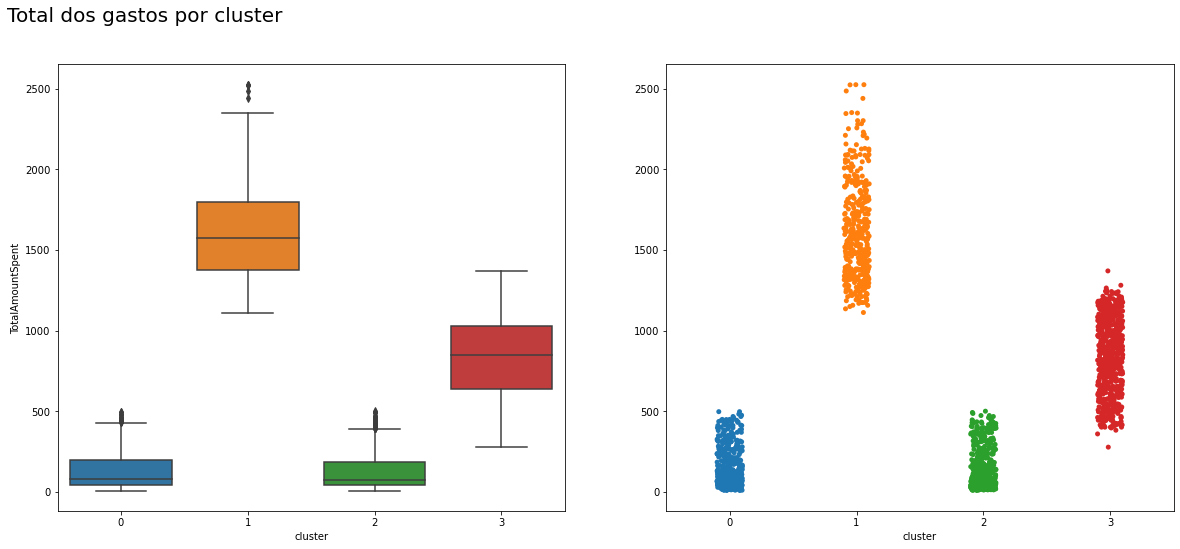

In [133]:
plot_final(df_final,'cluster','TotalAmountSpent','Total dos gastos por cluster')

**Nota:**
- O cluster 1 gasta muito mais que os outros grupos.

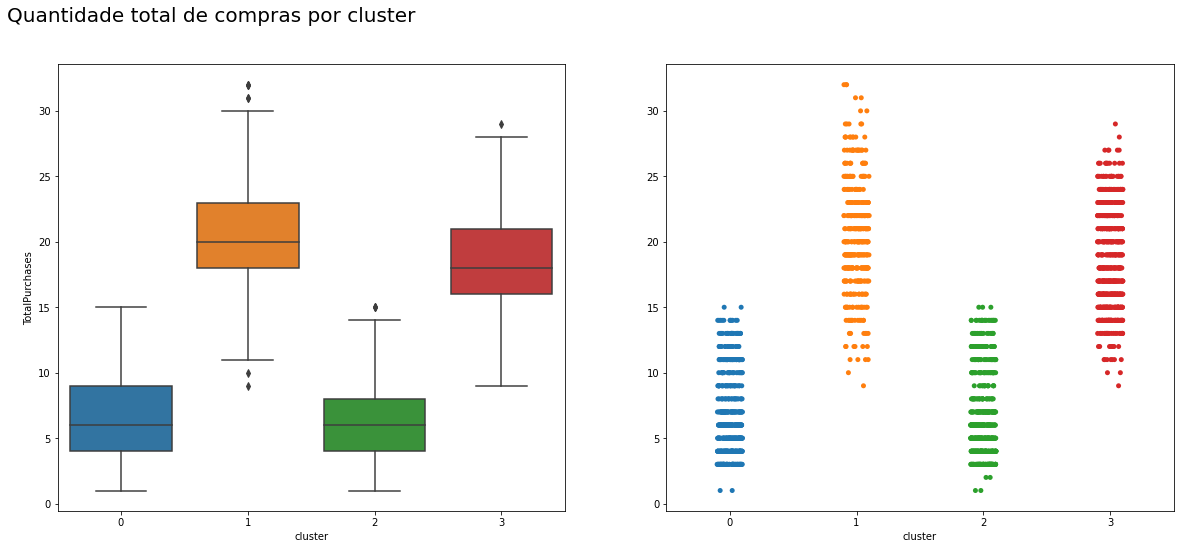

In [134]:
plot_final(df_final,'cluster','TotalPurchases','Quantidade total de compras por cluster')

**Nota:**
- Podemos ver que o Cluster 1 está acima em relação aos demais clusters, mas não tão distante que o Cluster 3, que indica que estes grupos tem uma quantidade de compras realizadas maior que os demais.

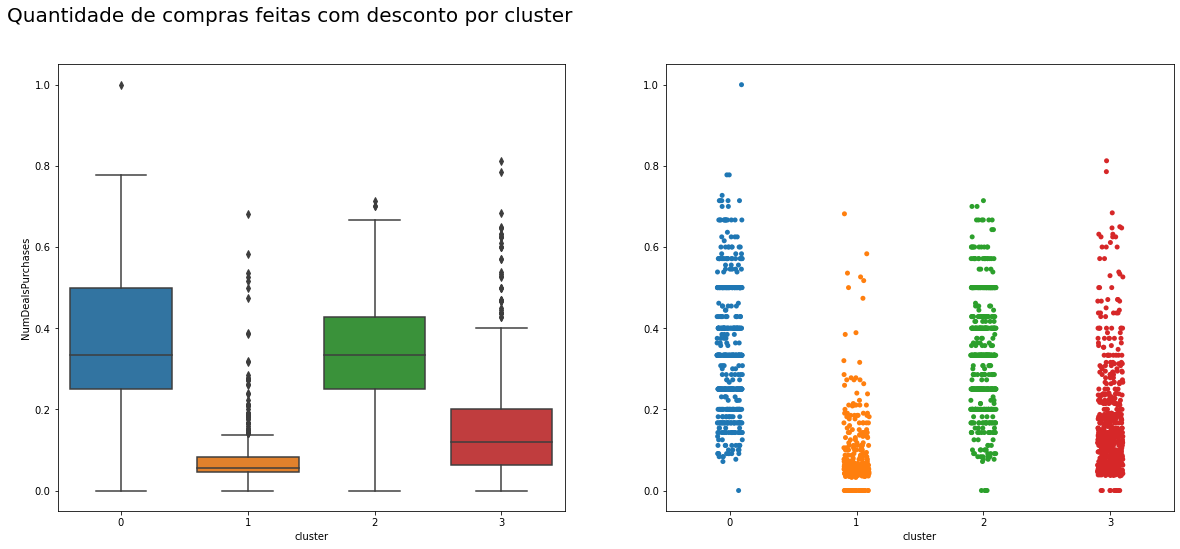

In [135]:
plot_final(df_final,'cluster','NumDealsPurchases','Quantidade de compras feitas com desconto por cluster')

**Nota:**
- Interessante o Cluster 1 em relação ao número de compras feitas com desconto, este grupo é o menor e algumas poucas pessoas gostam de comprar prudutos com desconto.
- Este é um grupo que não precisa mandar notícias de produtos com descontos.

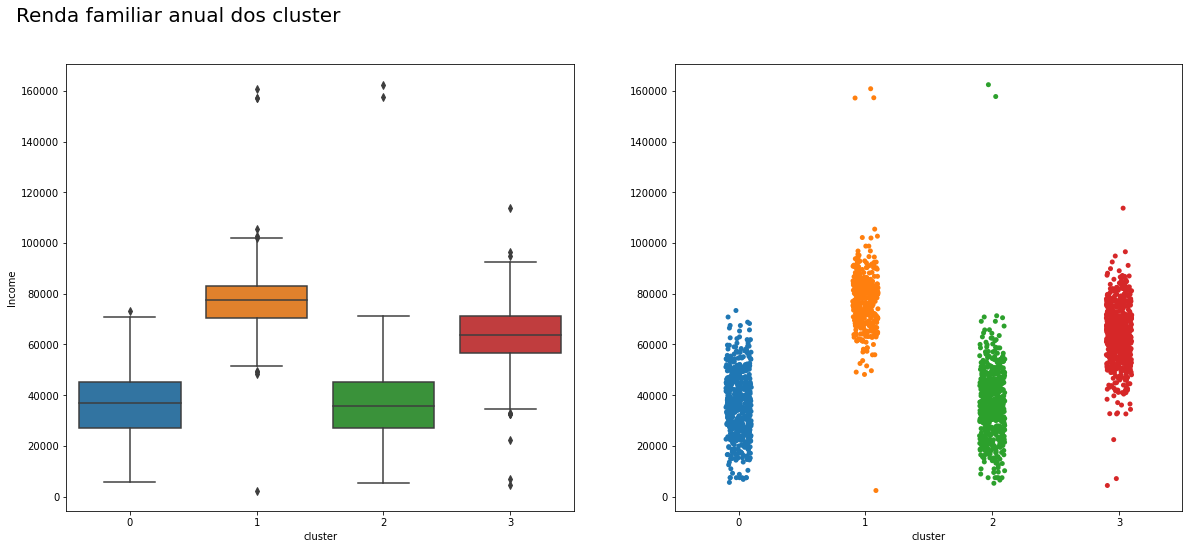

In [136]:
plot_final(df_final,'cluster','Income','Renda familiar anual dos cluster')

**Nota:**
- O grupo 1 e 3 é onde tem uma renda familiar maior que o grupo 0 e 2.

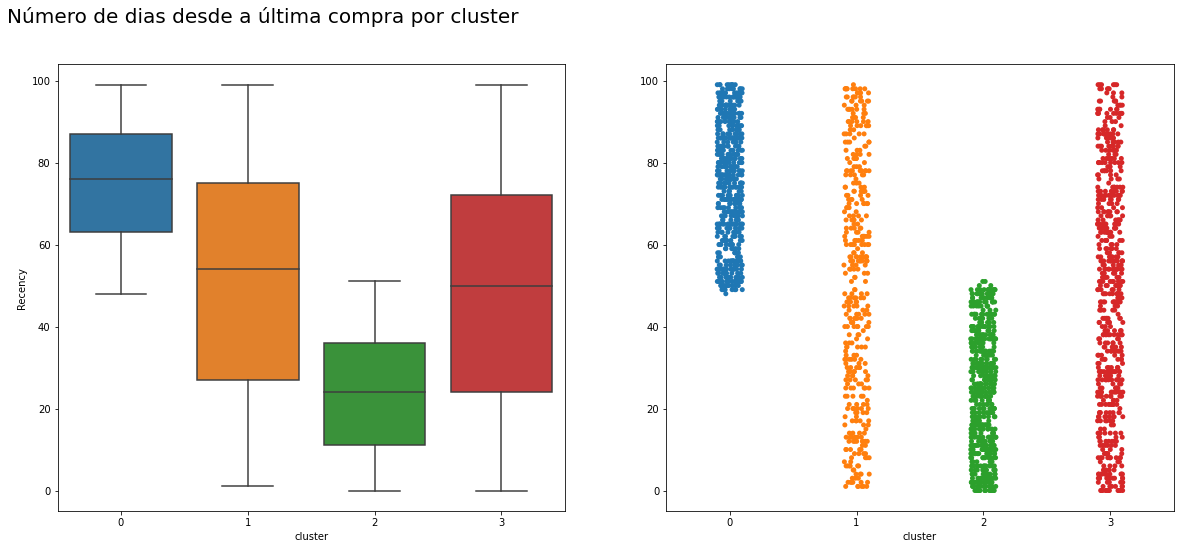

In [137]:
plot_final(df_final,'cluster','Recency','Número de dias desde a última compra por cluster')

**Nota:**
- O grupo 0 se mostra mais ativo que o grupo 2, talvez essa seja a diferença entre esses dois grupos.

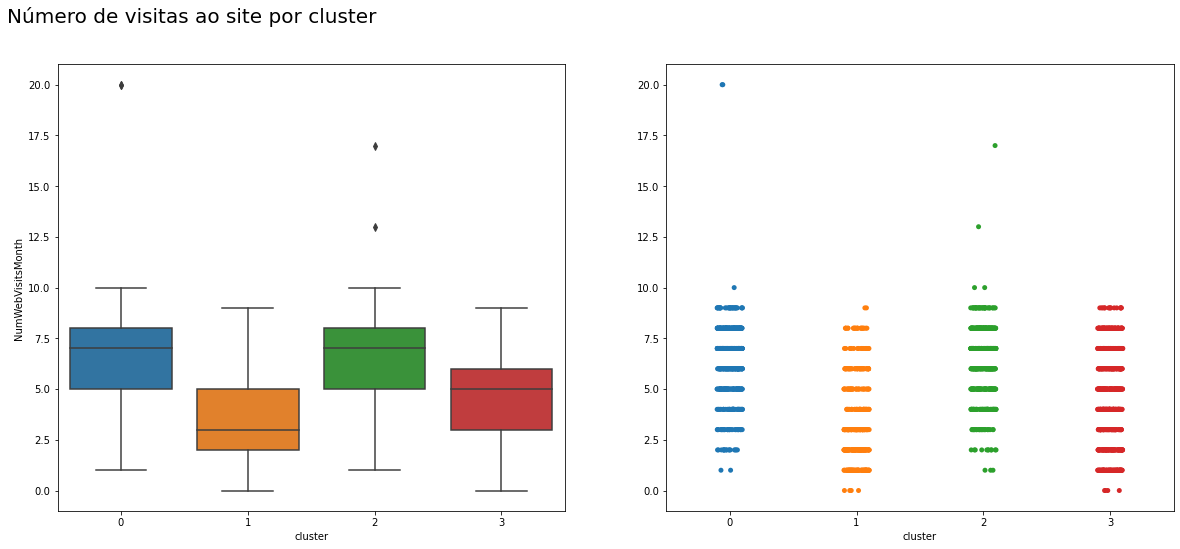

In [138]:
plot_final(df_final,'cluster','NumWebVisitsMonth','Número de visitas ao site por cluster')

**Nota:**
- O grupo 0 e 2 são os que mais visita o site da empresa.

# <font color='red'> 8 - INSIGHTS

**Agora com essas informações podemos usar para direcionar algumas estratégias de Marketing.**

**Cluster 1:**
- Grupo de mais alto valor, com menor número de clientes. Além de terem uma alta renda e maior nível de educação, são os que mais compram,  com ticket médio mais alto entre todos os grupos. Não costumam visitar tanto o website da empresa, nem comprar sempre através de promoções, pois preferem as compras por catálogo e diretamente na loja. As categorias preferidas são a de carnes. A maioria não tem filhos em casa e são os clientes cadastrados há mais tempo.
    
ticket médio é o valor médio de cada compra.

**Cluster 3:**
- É um grupo que realiza muitas compras, porém com ticket médio bem menor que o grupo anterior, mas ainda assim trazendo bastante receita para a empresa.  Os clientes têm um salário anual relativamente alto, são mais velhos e geralmente têm 1 filho em casa. É o grupo que mais aprecia a categoria de vinhos e que tem maior número de clientes.

**Cluster 0:**
- É o cluster com clientes com menor poder aquisitivo, porém são os menos ativos dentro da empresa. A empresa precisa tomar certo cuidado, pois estão churnando e deixando de comprar como antes. Os clientes gostam de fazer compras em promoções. Gostam de visitar o website, provavelmente para buscar promoções. Também gostam de gold prods. É uma oportunidade importante para a empresa fazer campanhas de produtos mais destinados ao público infantil.

**Cluster 2:**
- É um grupo jovem, porém são os mais ativos dentro da empresa. É o grupo que se cadastrou há menos tempo. É o grupo que menos aceita as campanhas de promoção.